In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

Importing Dataset and displaying some info

In [2]:
mcd=pd.read_csv('mcdonalds.csv')

In [3]:
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
mcd.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Label Encoding to convert Yes and No to 0s and 1s

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
    
for i in cols:
    mcd[i]=le.fit_transform(mcd[i])


Converting the Like columns

In [6]:
mcd["Like"]=mcd["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})

In [7]:
mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int32 
 1   convenient      1453 non-null   int32 
 2   spicy           1453 non-null   int32 
 3   fattening       1453 non-null   int32 
 4   greasy          1453 non-null   int32 
 5   fast            1453 non-null   int32 
 6   cheap           1453 non-null   int32 
 7   tasty           1453 non-null   int32 
 8   expensive       1453 non-null   int32 
 9   healthy         1453 non-null   int32 
 10  disgusting      1453 non-null   int32 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int32(11), int64(1), object(3)
memory usage: 108.0+ KB


In [8]:
mcd.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


Displaying mean of all numerical classes

In [9]:
import pandas as pd
import numpy as np

df = mcd.iloc[:, 0:11].values
# MD_x = (MD_x == "Yes").astype(int)
result = np.round(np.mean(df, axis=0), 2)

print(result)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [10]:
df.shape

(1453, 11)

Analysis of Principal Components

In [11]:
from sklearn.decomposition import PCA
import pandas as pd

# Create a PCA object
pca = PCA()

# Fit the PCA model to the data
MD_pca = pca.fit_transform(df)

# Get the summary of the PCA results
summary = pd.DataFrame({
    "Standard deviation": np.sqrt(pca.explained_variance_),
    "Proportion of Variance": pca.explained_variance_ratio_,
    "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)
}, index=range(1, df.shape[1]+1))

print(summary)


    Standard deviation  Proportion of Variance  Cumulative Proportion
1             0.757050                0.299447               0.299447
2             0.607456                0.192797               0.492244
3             0.504619                0.133045               0.625290
4             0.398799                0.083096               0.708386
5             0.337405                0.059481               0.767866
6             0.310275                0.050300               0.818166
7             0.289697                0.043849               0.862015
8             0.275122                0.039548               0.901563
9             0.265251                0.036761               0.938323
10            0.248842                0.032353               0.970677
11            0.236903                0.029323               1.000000


In [12]:
np.set_printoptions(precision=1) 
print(MD_pca)


[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


In [13]:
# Print the standard deviations
print("Standard deviations (1, .., p=11):")
print(pca.singular_values_.round(1))

# Print the rotation
print("Rotation (n x k) = (11 x 11):")
rotation_df = pd.DataFrame(pca.components_, columns=mcd.columns[:11])
rotation_df.columns = [f"PC{i+1}" for i in range(pca.n_components_)]
print(rotation_df.round(3))

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
0  -0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214   
1   0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077   
2  -0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192   
3   0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763   
4  -0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288   
5   0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178   
6  -0.281 -0.060  0.708 -0.386  0.036 -0.087 -0.040  0.360 -0.068 -0.350   
7   0.013 -0.113  0.376  0.590 -0.138 -0.628  0.140 -0.073  0.030  0.176   
8   0.572 -0.018  0.400 -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186   
9  -0.110 -0.666 -0.076 -0.005  0.009  0.240  0.428  0.079  0.454 -0.038   
10  0.045 -0.542  0.142  0.251  0.002  0.3

Diagrammatical analysis of Principal Components

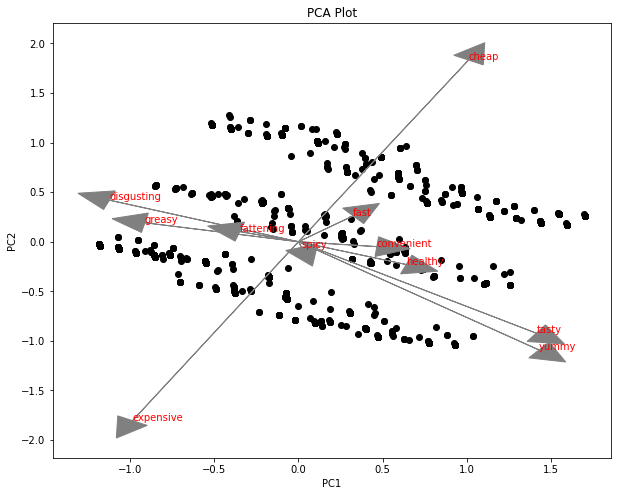

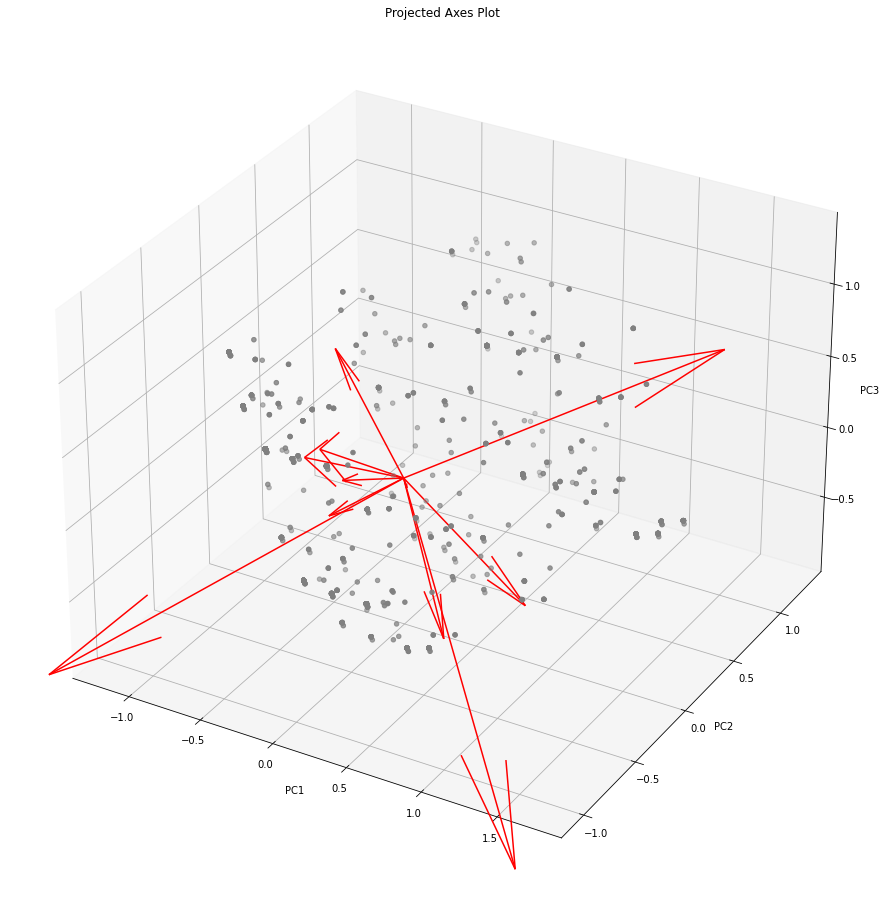

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10,8))
# Generate PCA plot with axes
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='black')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")

column_names=mcd.columns

# Plotting axes
for i, (col, name) in enumerate(zip(MD_pca.T, column_names)):
    arrow_start = (0, 0)
    arrow_end = -1*pca.components_[:2, i] * 3  
    plt.arrow(*arrow_start, *arrow_end, head_width=0.2, head_length=0.2, fc='grey', ec='grey')
    plt.text(arrow_end[0], arrow_end[1], name, color='red')

plt.show()

# Generate projected axes plot with axes
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], MD_pca[:, 2], c='grey')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Projected Axes Plot")

# Plotting axes
for i, col in enumerate(MD_pca.T):
    arrow_start = (0, 0, 0)
    arrow_end = pca.components_[:3, i] * 3 
    ax.quiver(*arrow_start, *arrow_end, color='red')
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

plt.show()


Performing kmeans and analyszing the optimum number of segments

In [15]:
import numpy as np
from sklearn.cluster import KMeans


# Perform k-means clustering with k values ranging from 2 to 8
k_values = range(2, 9)
best_model = None
best_score = np.inf

for k in k_values:
    # Run k-means clustering with 10 repetitions
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(df)

    # Compute the inertia (sum of squared distances of samples to their closest cluster center)
    score = model.inertia_

    # Update the best model based on the inertia score
    if score < best_score:
        best_model = model
        best_score = score

# Access the cluster labels
cluster_labels = best_model.labels_

# Print the cluster labels
print(cluster_labels)


[4 2 5 ... 5 3 0]


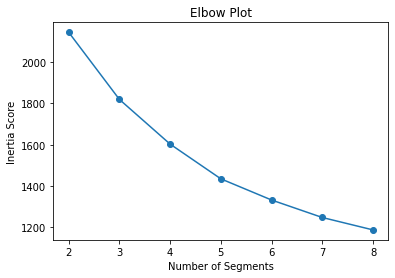

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Perform k-means clustering with k values ranging from 2 to 8
k_values = range(2, 9)
inertia_scores = []

for k in k_values:
    # Run k-means clustering
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(df)

    # Compute the inertia score
    score = model.inertia_
    inertia_scores.append(score)

# Plotting the inertia scores
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia Score")
plt.title("Elbow Plot")

plt.show()


Performing kmeans with clusters(segments)=4

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)
mcd['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) 
print (kmeans.inertia_) 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.060444055892
7
[[0.9 1.  0.1 0.9 0.6 0.9 0.1 0.9 0.9 0.2 0.1]
 [0.9 1.  0.1 0.8 0.3 1.  0.9 1.  0.  0.3 0. ]
 [0.  0.9 0.1 0.9 0.7 1.  0.9 0.2 0.  0.1 0.4]
 [0.  0.7 0.1 0.9 0.7 0.7 0.1 0.1 0.9 0.1 0.7]]


In [18]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

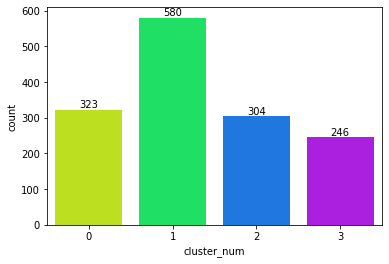

In [19]:
f = sns.countplot(x=mcd["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)

Bootstrap indices analysis of segments 2-9

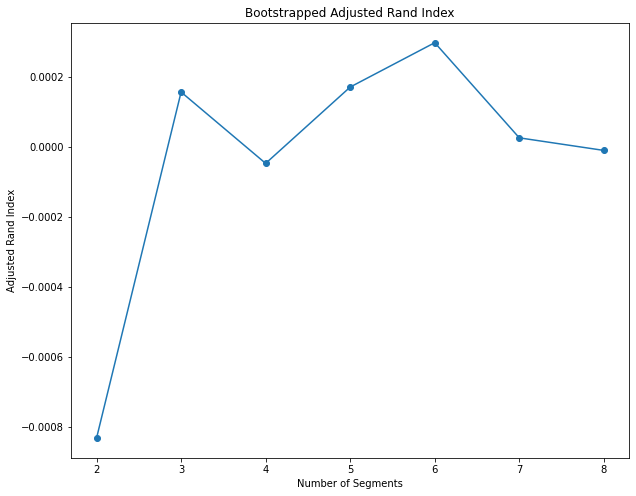

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

fig=plt.figure(figsize=(10,8))

# Perform bootstrapping on k-means clustering with k values ranging from 2 to 8
k_values = range(2, 9)
nrep = 10  # Number of repetitions
nboot = 100  # Number of bootstrap iterations

adjusted_rand_indices = []

for k in k_values:
    # Run k-means clustering with the specified number of clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(df)

    # Perform bootstrap iterations
    bootstrap_indices = []
    for _ in range(nboot):
        # Resample the data with replacement
        resampled_data = resample(df, random_state=np.random.randint(100))

        # Fit k-means clustering on the resampled data
        bootstrap_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
        bootstrap_model.fit(resampled_data)

        # Compute the adjusted Rand index between the bootstrap model and the original model
        adjusted_rand_index = adjusted_rand_score(model.labels_, bootstrap_model.labels_)
        bootstrap_indices.append(adjusted_rand_index)

    # Compute the mean of bootstrap adjusted Rand indices
    mean_adjusted_rand_index = np.mean(bootstrap_indices)
    adjusted_rand_indices.append(mean_adjusted_rand_index)

# Plotting the adjusted Rand index against the number of segments
plt.plot(k_values, adjusted_rand_indices, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrapped Adjusted Rand Index")

plt.show()


<Figure size 720x576 with 0 Axes>

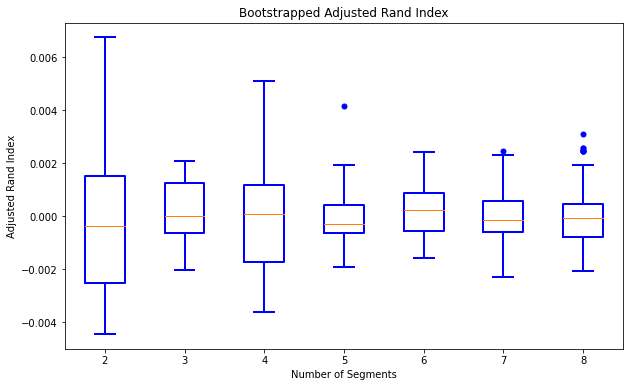

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

fig=plt.figure(figsize=(10,8))

# Perform bootstrapping on k-means clustering with k values ranging from 2 to 8
k_values = range(2, 9)
nrep = 10  
nboot = 100 

bootstrap_adjusted_rand_indices = []

for k in k_values:
    # Run k-means clustering with the specified number of clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(df)

    # Perform bootstrap iterations
    bootstrap_indices = []
    for _ in range(nboot):
        # Resample the data with replacement
        resampled_data = resample(df, random_state=np.random.randint(100))

        # Fit k-means clustering on the resampled data
        bootstrap_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
        bootstrap_model.fit(resampled_data)

        # Compute the adjusted Rand index 
        adjusted_rand_index = adjusted_rand_score(model.labels_, bootstrap_model.labels_)
        bootstrap_indices.append(adjusted_rand_index)

    # Store the bootstrap adjusted Rand indices
    bootstrap_adjusted_rand_indices.append(bootstrap_indices)

# Create a box plot of the bootstrap adjusted Rand indices
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired

# Customize the box plot appearance
boxprops = dict(linewidth=2, color='blue')
whiskerprops = dict(linewidth=2, color='blue')
capprops = dict(linewidth=2, color='blue')
flierprops = dict(marker='o', markersize=5, markerfacecolor='blue', markeredgecolor='blue')

# Create the box plot
plt.boxplot(bootstrap_adjusted_rand_indices, notch=False, sym='o', vert=True,
            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
            flierprops=flierprops)

# Set the x-axis tick labels
plt.xticks(range(1, len(k_values) + 1), k_values)

# Set the axis labels and title
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrapped Adjusted Rand Index")

plt.show()


In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Set the random seed
# np.random.seed(1234)

# # Assuming MD_x contains the preprocessed binary matrix as shown in a previous code snippet

# # Perform k-means clustering with the desired number of clusters
# k = 4
# model = KMeans(n_clusters=k, n_init=10, random_state=1234)
# model.fit(df)

# # Get the cluster labels for each data point
# cluster_labels = model.labels_



# for c in range(1,5):
#     # Get the data points belonging to cluster 4
#     fig=plt.figure(figsize=(10, 6))
#     cluster_4_data = df[cluster_labels == c]

#     # Plot the histogram of cluster 4 data
#     plt.hist(cluster_4_data, bins=10, range=(0, 1))

#     # Set the x-axis and y-axis labels
#     plt.xlabel("Value")
#     plt.ylabel("Frequency")
#     plt.title(f"Histogram of Cluster {c}")

#     plt.show()


Information criteria for the mixture models of binary distributions with 2 to 8 components (segments) for the fast food data set

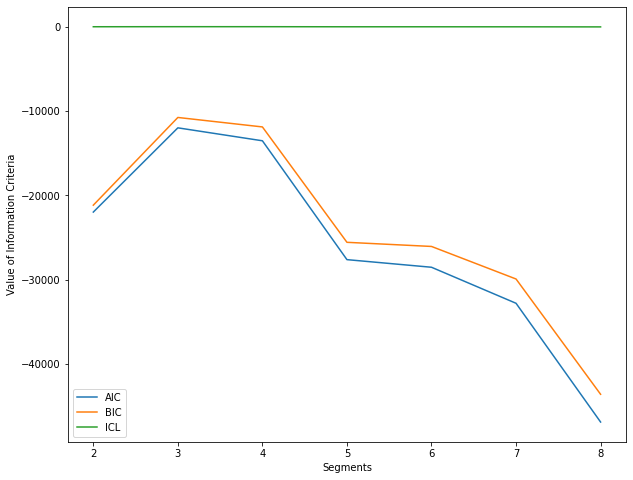

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


fig=plt.figure(figsize=(10, 8))

# Perform stepwise model selection with k values ranging from 2 to 8
k_values = range(2, 9)
aic_values = []
bic_values = []
icl_values = []

for k in k_values:
    # Initialize and fit the Gaussian Mixture model
    model = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    model.fit(df)

    # Calculate the AIC, BIC, and ICL
    aic = model.aic(df)
    bic = model.bic(df)
    icl = -2 * model.lower_bound_

    # Append the information criteria values
    aic_values.append(aic)
    bic_values.append(bic)
    icl_values.append(icl)

# Plot the information criteria
plt.plot(k_values, aic_values, label="AIC")
plt.plot(k_values, bic_values, label="BIC")
plt.plot(k_values, icl_values, label="ICL")

# Set the y-axis label
plt.ylabel("Value of Information Criteria")
plt.xlabel("Segments")

# Set the legend
plt.legend()

# Show the plot
plt.show()


Analyzing 'Like' column and setting the range from 0 to 11

In [24]:
import pandas as pd

# Replace invalid values with NaN
# mcd['Like'] = pd.to_numeric(mcd['Like'], errors='coerce')

# Reverse the frequency table of the 'Like' column
like_freq_table = mcd['Like'].value_counts().sort_index(ascending=False)
reversed_like_freq_table = like_freq_table.iloc[::-1]
print(reversed_like_freq_table)

# Create a new column 'Like.n' with transformed values
mcd['Like.n'] = 6 - mcd['Like'].astype(float).astype(int)
like_n_freq_table = mcd['Like.n'].value_counts().sort_index()
print(like_n_freq_table)


+1    152
+2    187
+3    229
+4    160
+5    143
-1     58
-2     59
-3     73
-4     71
-5    152
0     169
Name: Like, dtype: int64
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: Like.n, dtype: int64


Concatenating column names(not important)

In [25]:
import pandas as pd

# Get the column names from the DataFrame
column_names = mcd.columns[0:11]

# Concatenate the column names with '+'
f = ' + '.join(column_names)

# Create the formula string
f = "Like.n ~ " + f

# Print the formula
print(f)


Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set the random seed
np.random.seed(1234)

# Define the formula string
# f = "Like.n ~ Column1 + Column2 + Column3 + Column4 + Column5 + Column6 + Column7 + Column8 + Column9 + Column10 + Column11"

# Fit the stepwise regression model
X = mcd.drop('Like.n', axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables if needed
X = StandardScaler().fit_transform(X)  # Standardize the features if needed
y = mcd['Like.n']
X = sm.add_constant(X)  # Add a constant column
model = sm.OLS(y, X)
result = model.fit()
significant_indices = np.where(result.pvalues[1:] < 0.05)[0]  # Select significant features based on p-values

# Print the selected features
print("Selected Features:")
print(significant_indices)


Selected Features:
[ 5  6  8 11 13 14 15 16 17 18 19 20 21 22 25 26]


Analysing columns clusterwise

In [27]:
result=[]
for i in cols:
    Gender = mcd.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.854489
1            1  0.887931
2            2  0.023026
3            3  0.020325
   cluster_num  convenient
0            0    0.962848
1            1    0.981034
2            2    0.891447
3            3    0.682927
   cluster_num     spicy
0            0  0.133127
1            1  0.086207
2            2  0.072368
3            3  0.085366
   cluster_num  fattening
0            0   0.907121
1            1   0.794828
2            2   0.924342
3            3   0.914634
   cluster_num    greasy
0            0  0.619195
1            1  0.329310
2            2  0.667763
3            3  0.695122
   cluster_num      fast
0            0  0.860681
1            1  0.960345
2            2  0.963816
3            3  0.731707
   cluster_num     cheap
0            0  0.108359
1            1  0.922414
2            2  0.934211
3            3  0.065041
   cluster_num     tasty
0            0  0.931889
1            1  0.975862
2            2  0.154605
3         

In [28]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(mcd['cluster_num'],mcd['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


Cluster Analysis(Diagrammatic)

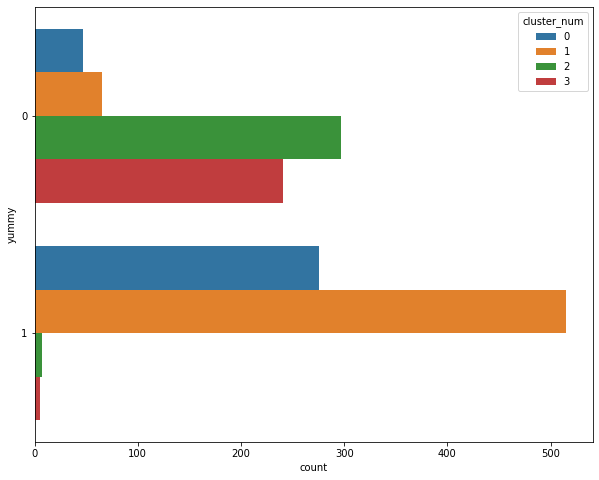

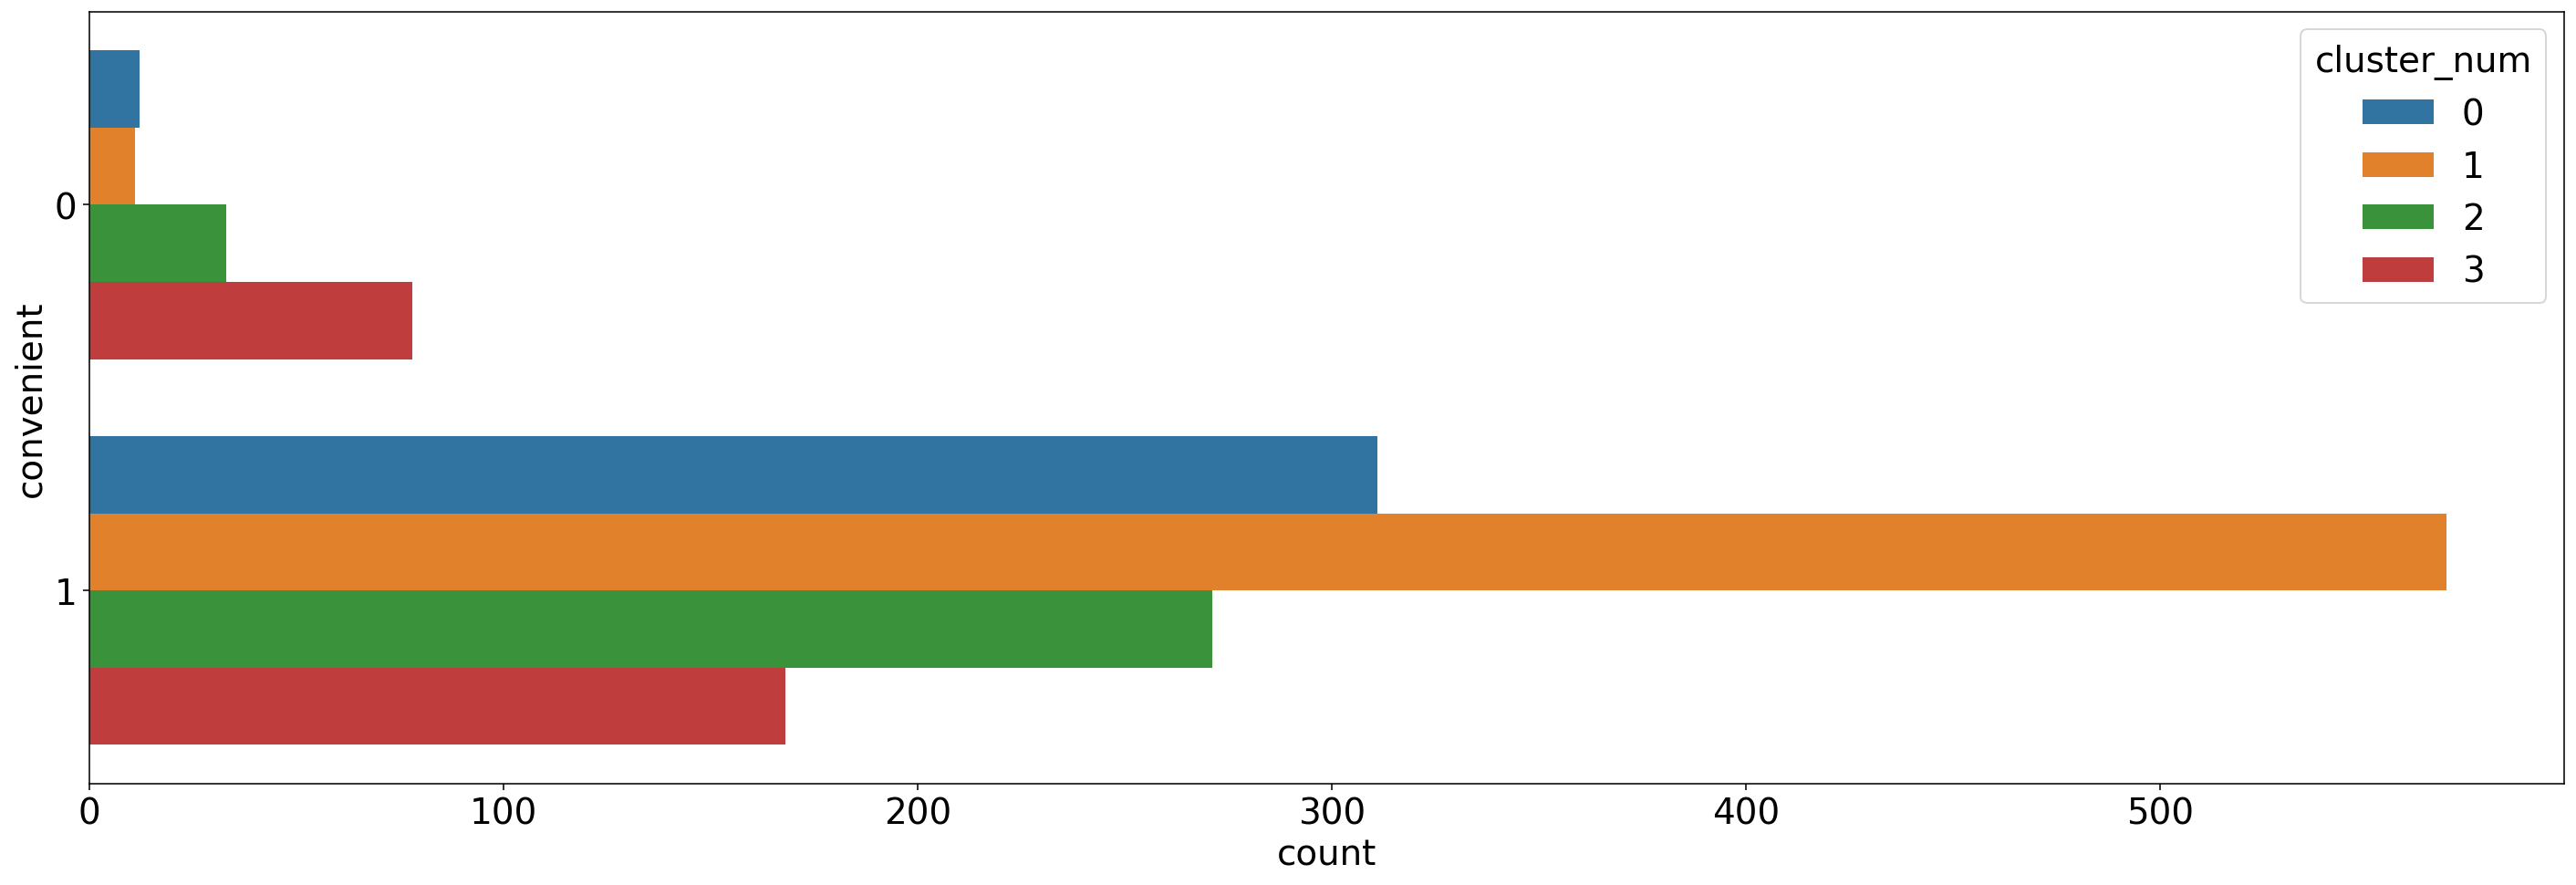

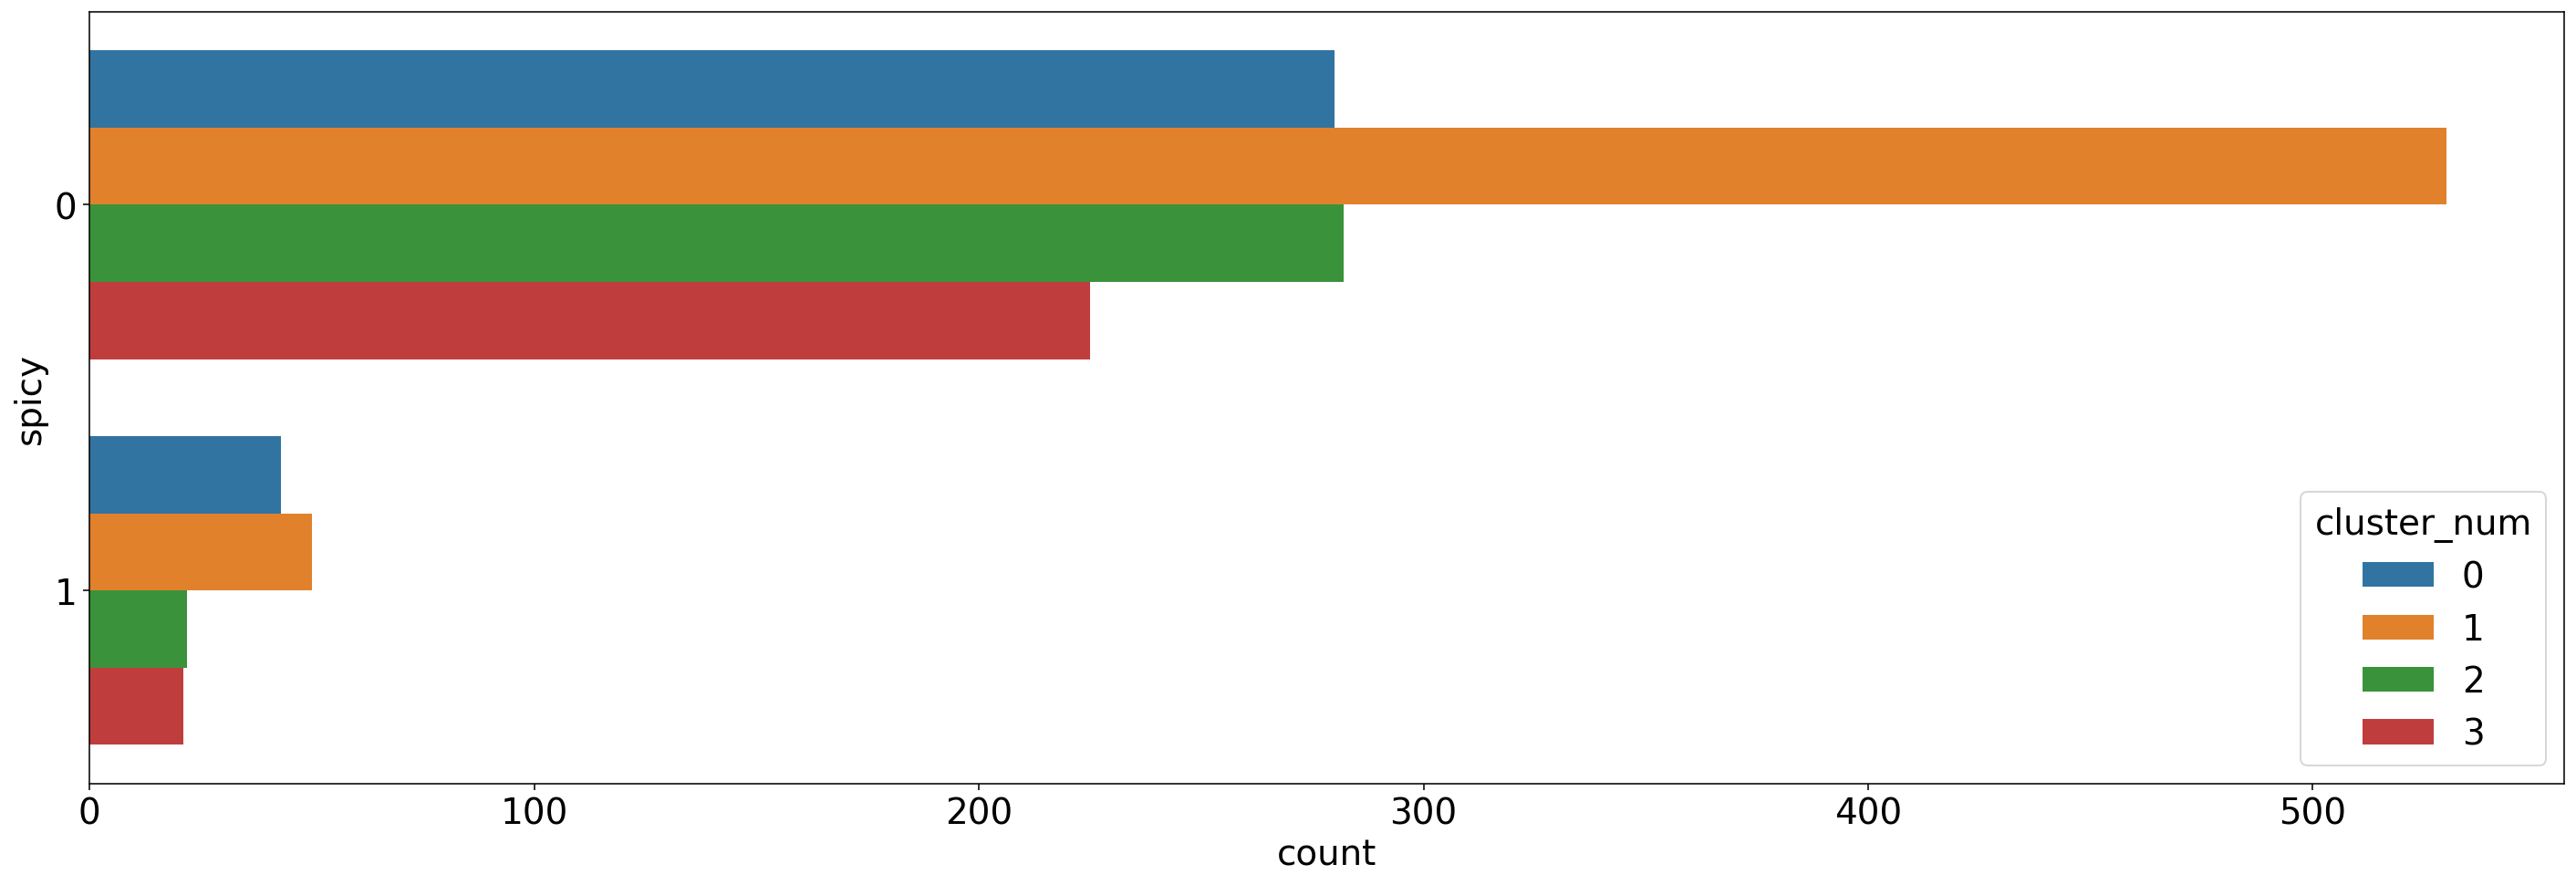

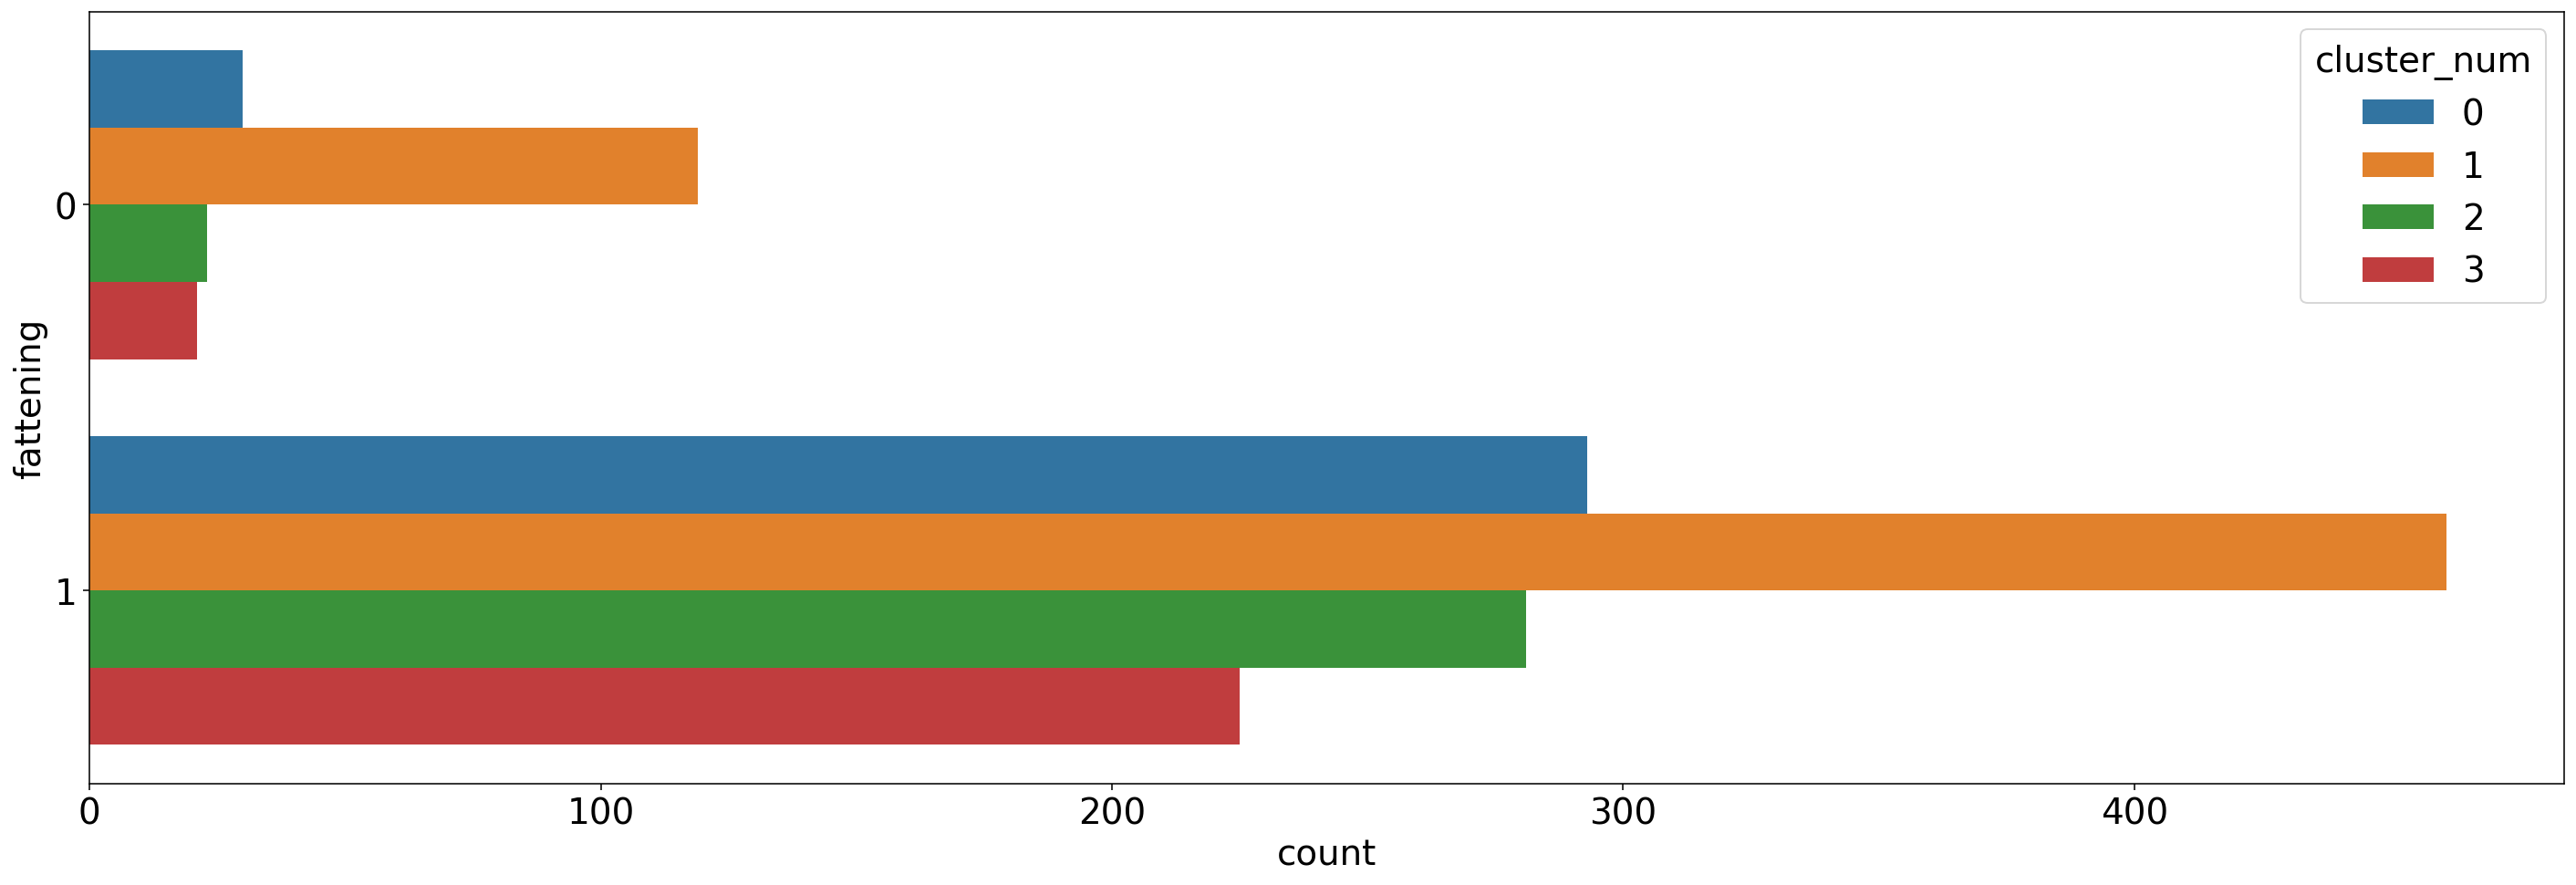

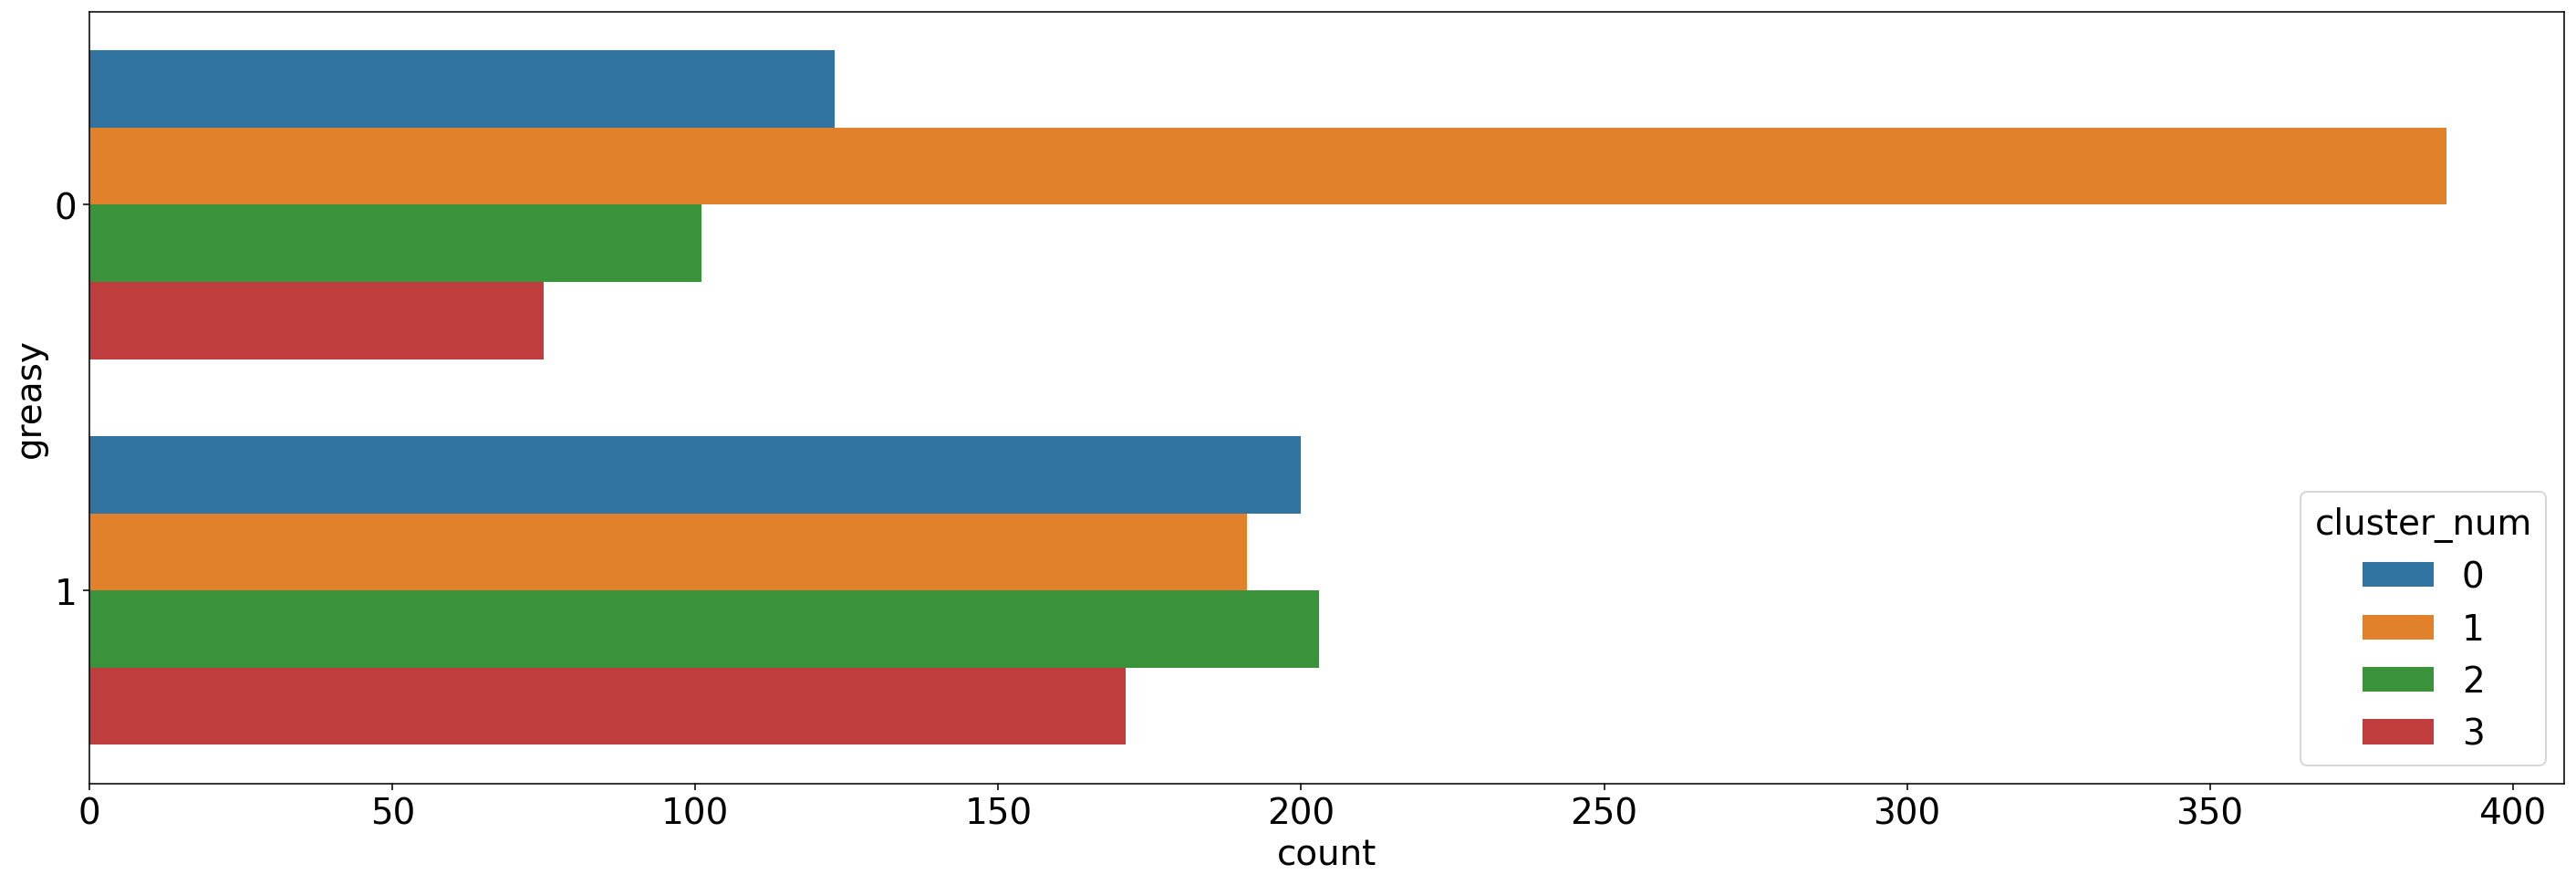

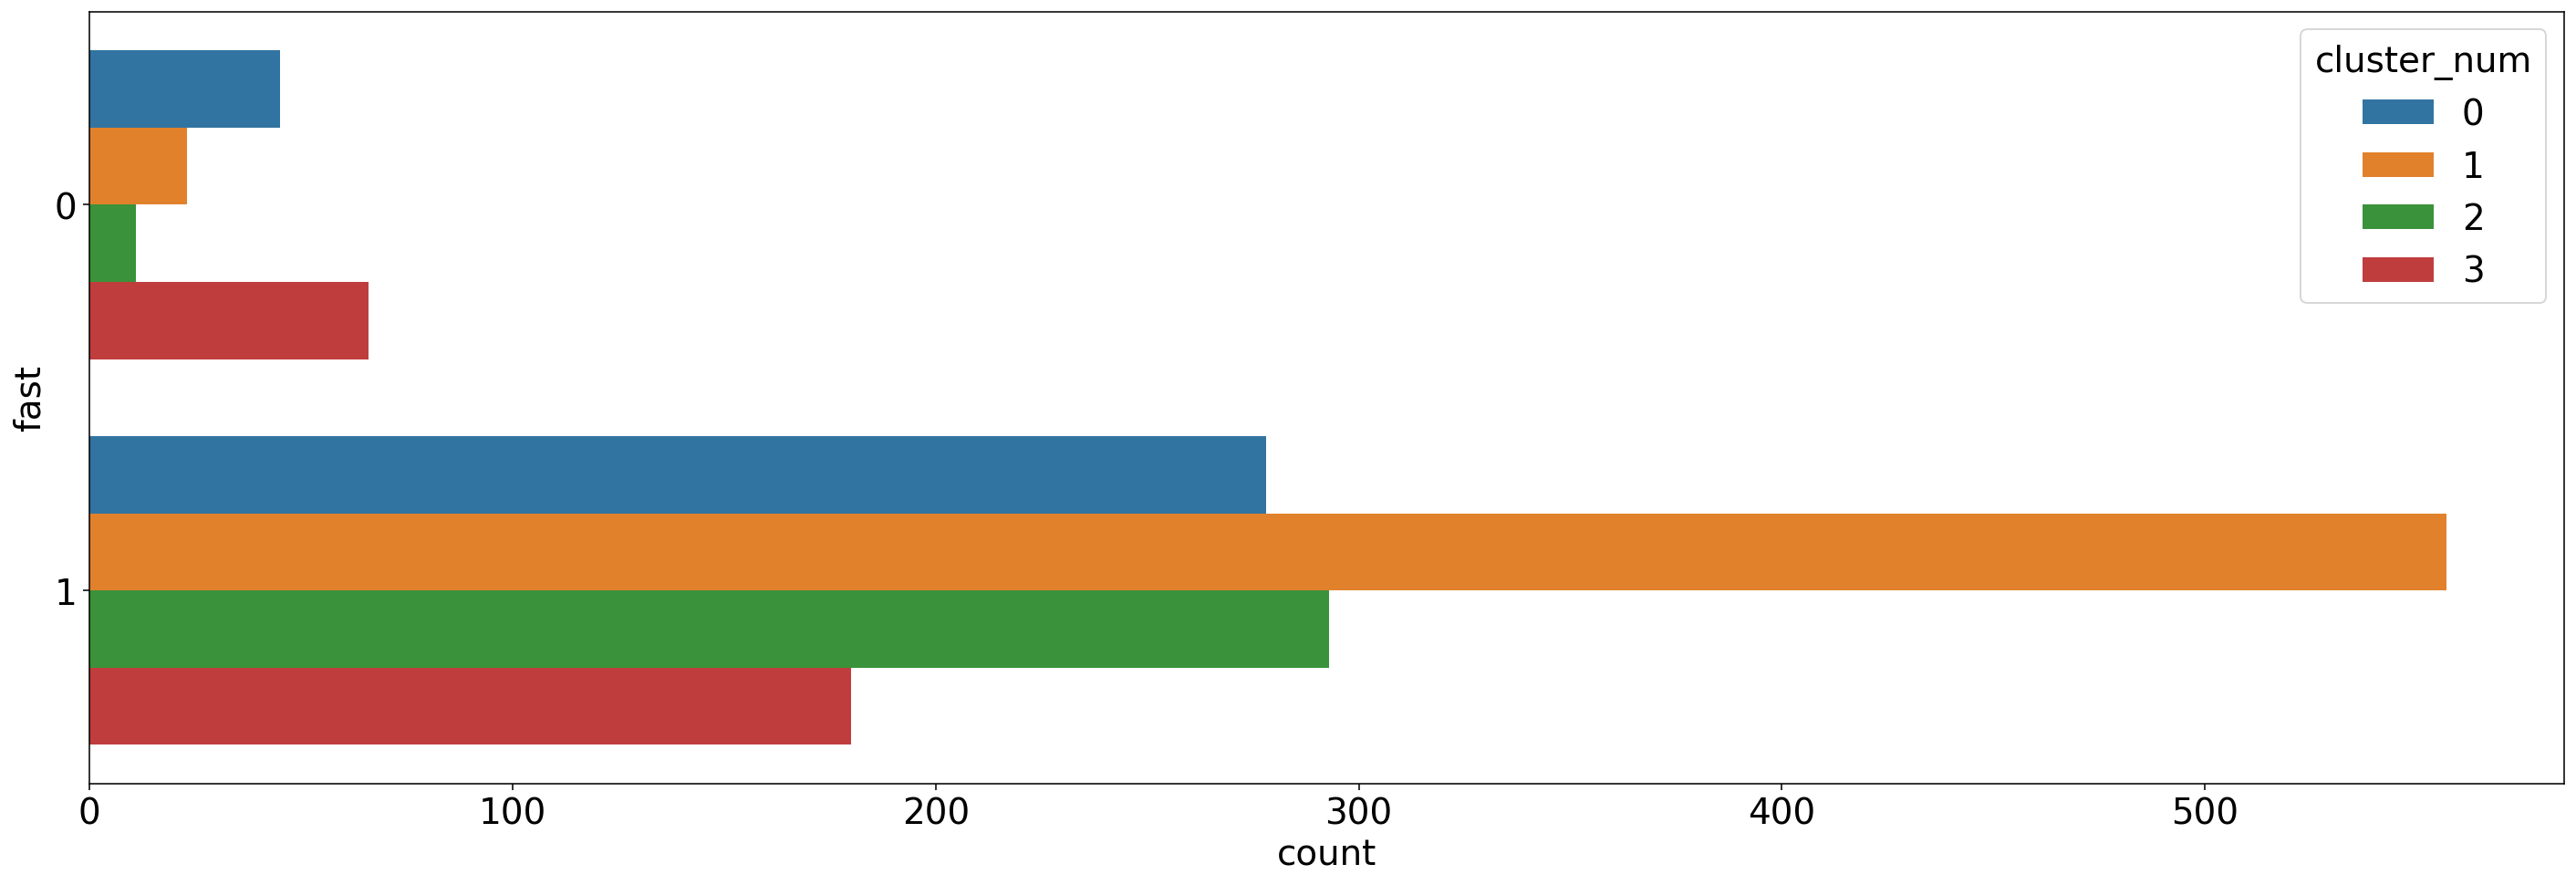

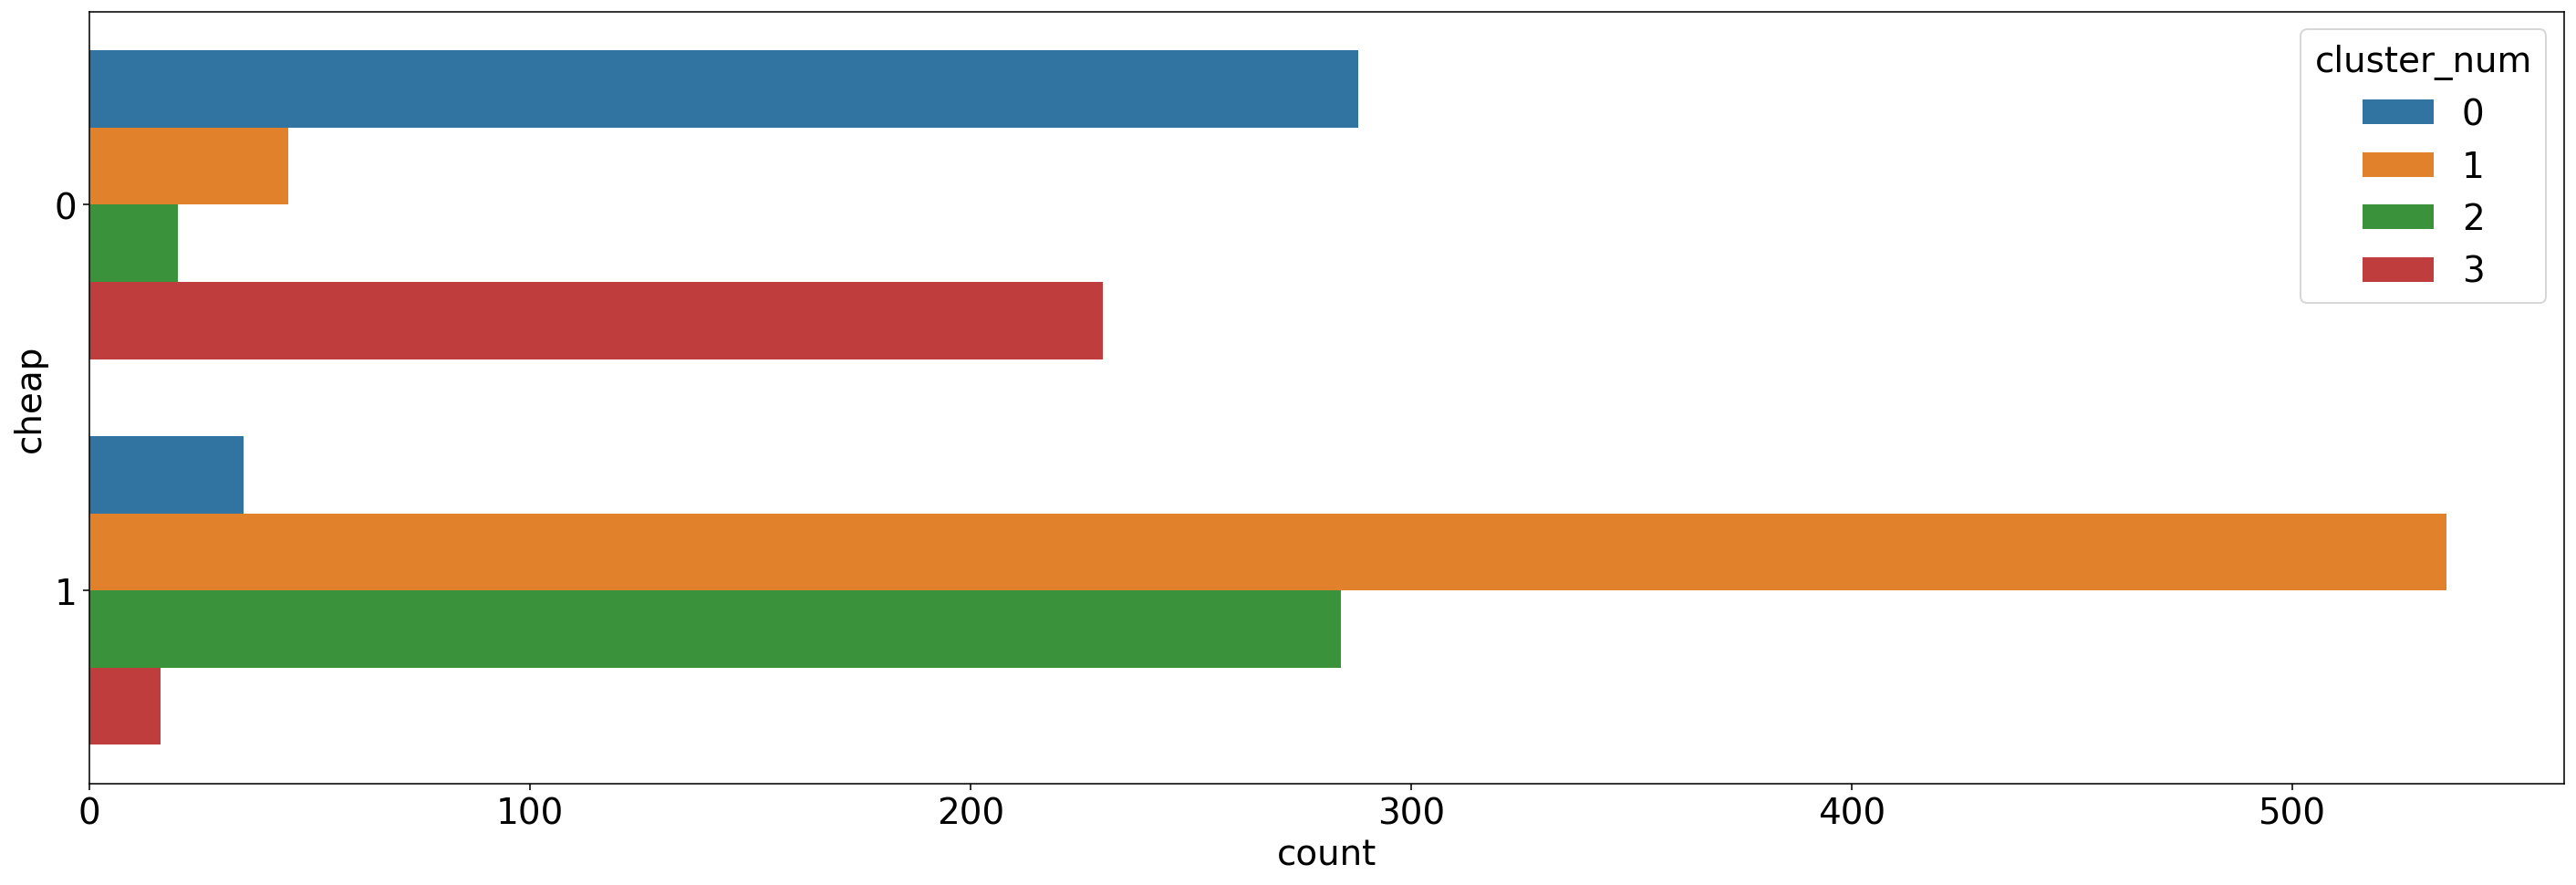

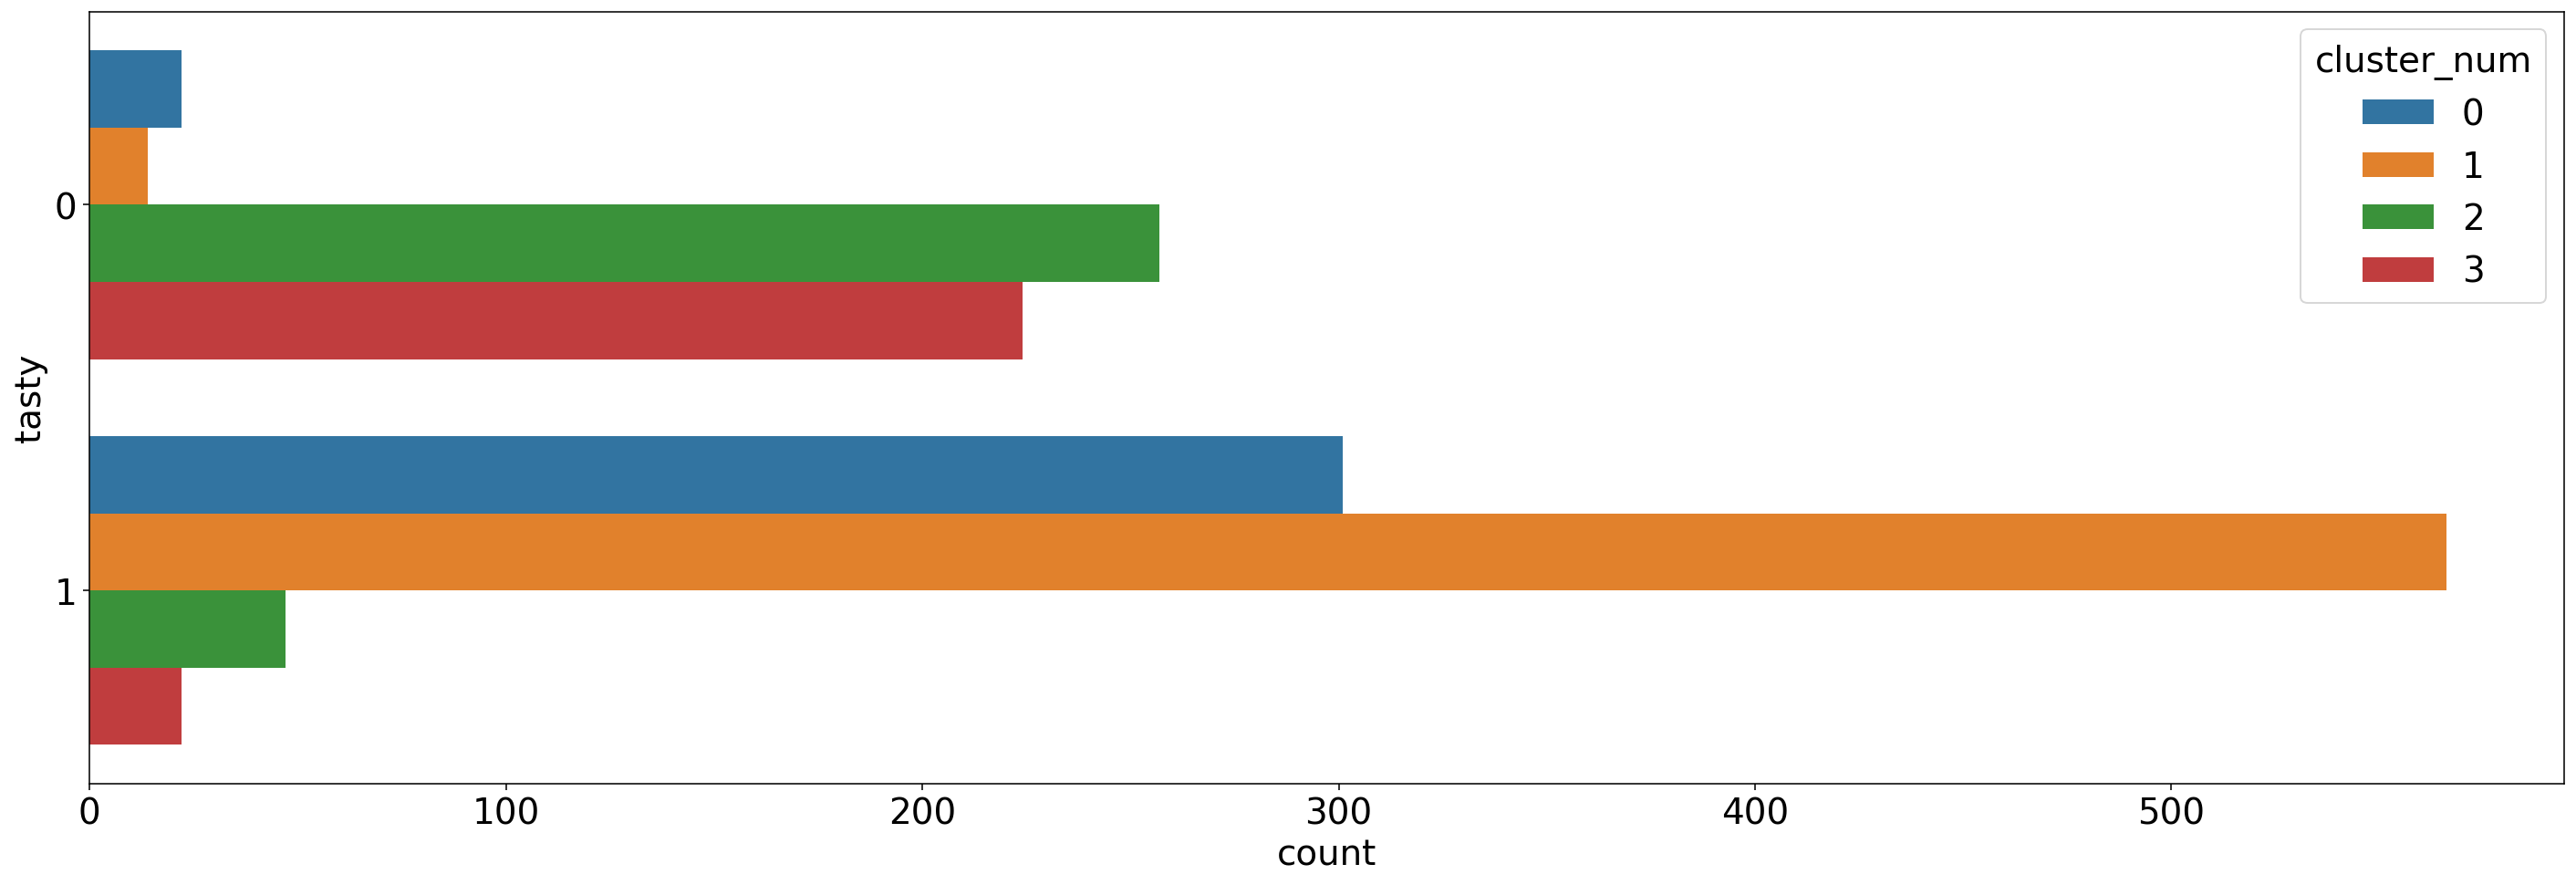

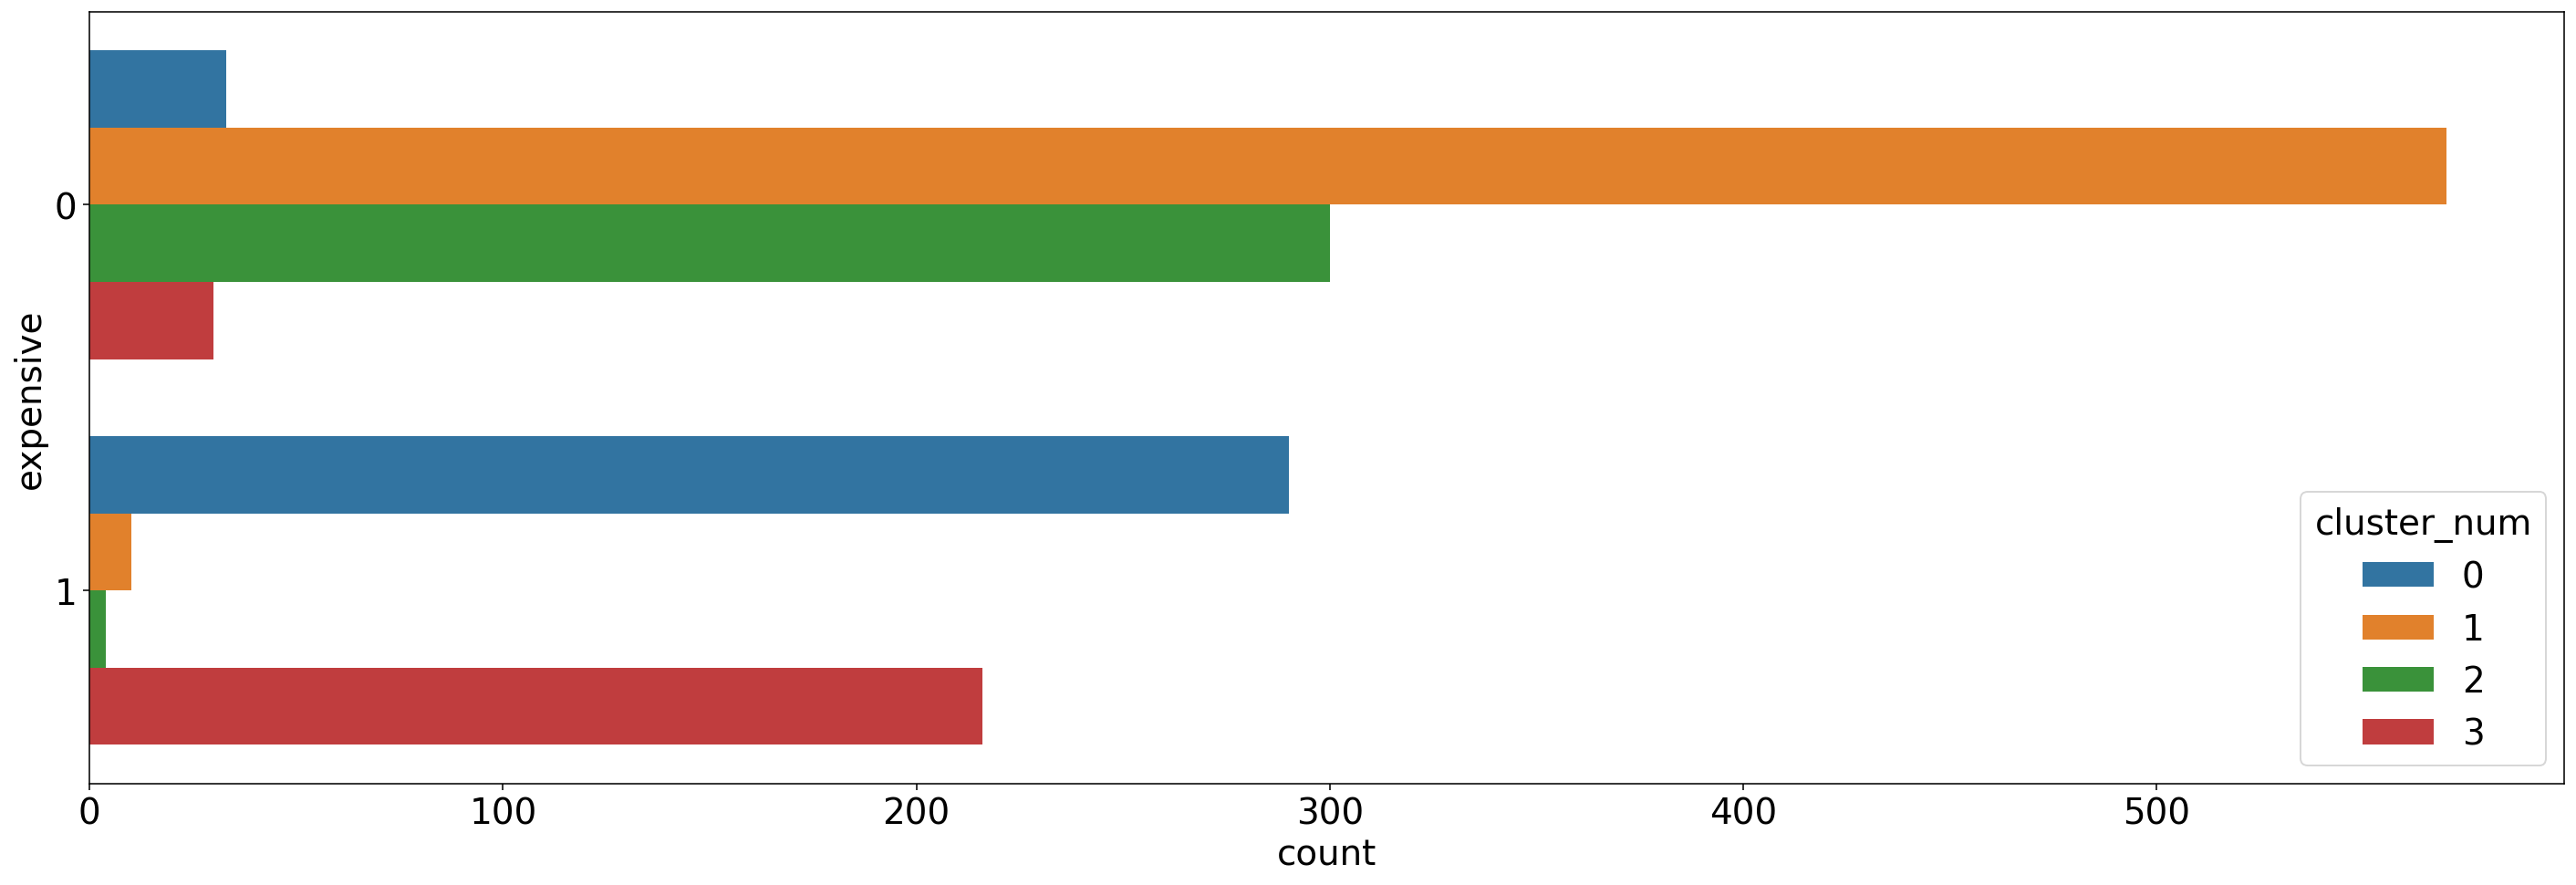

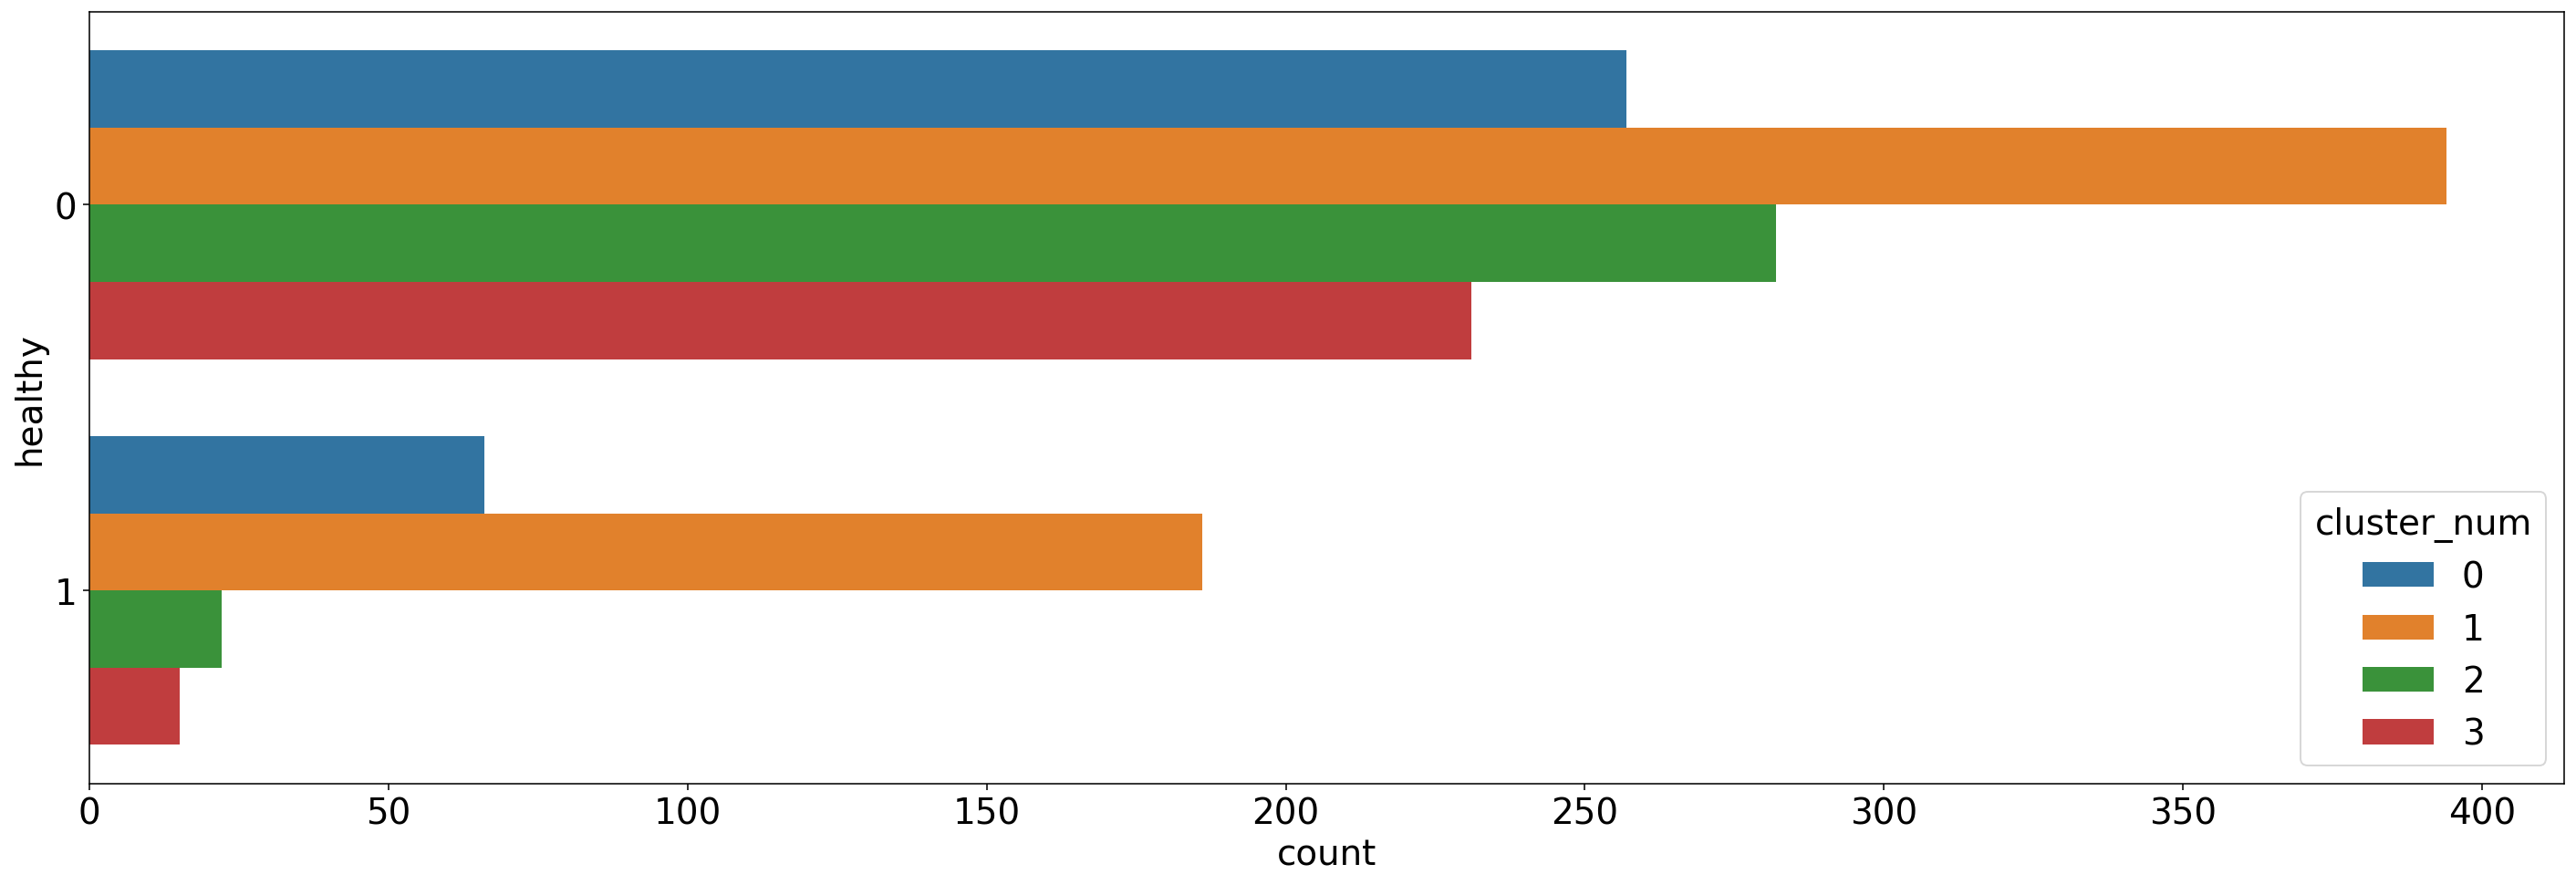

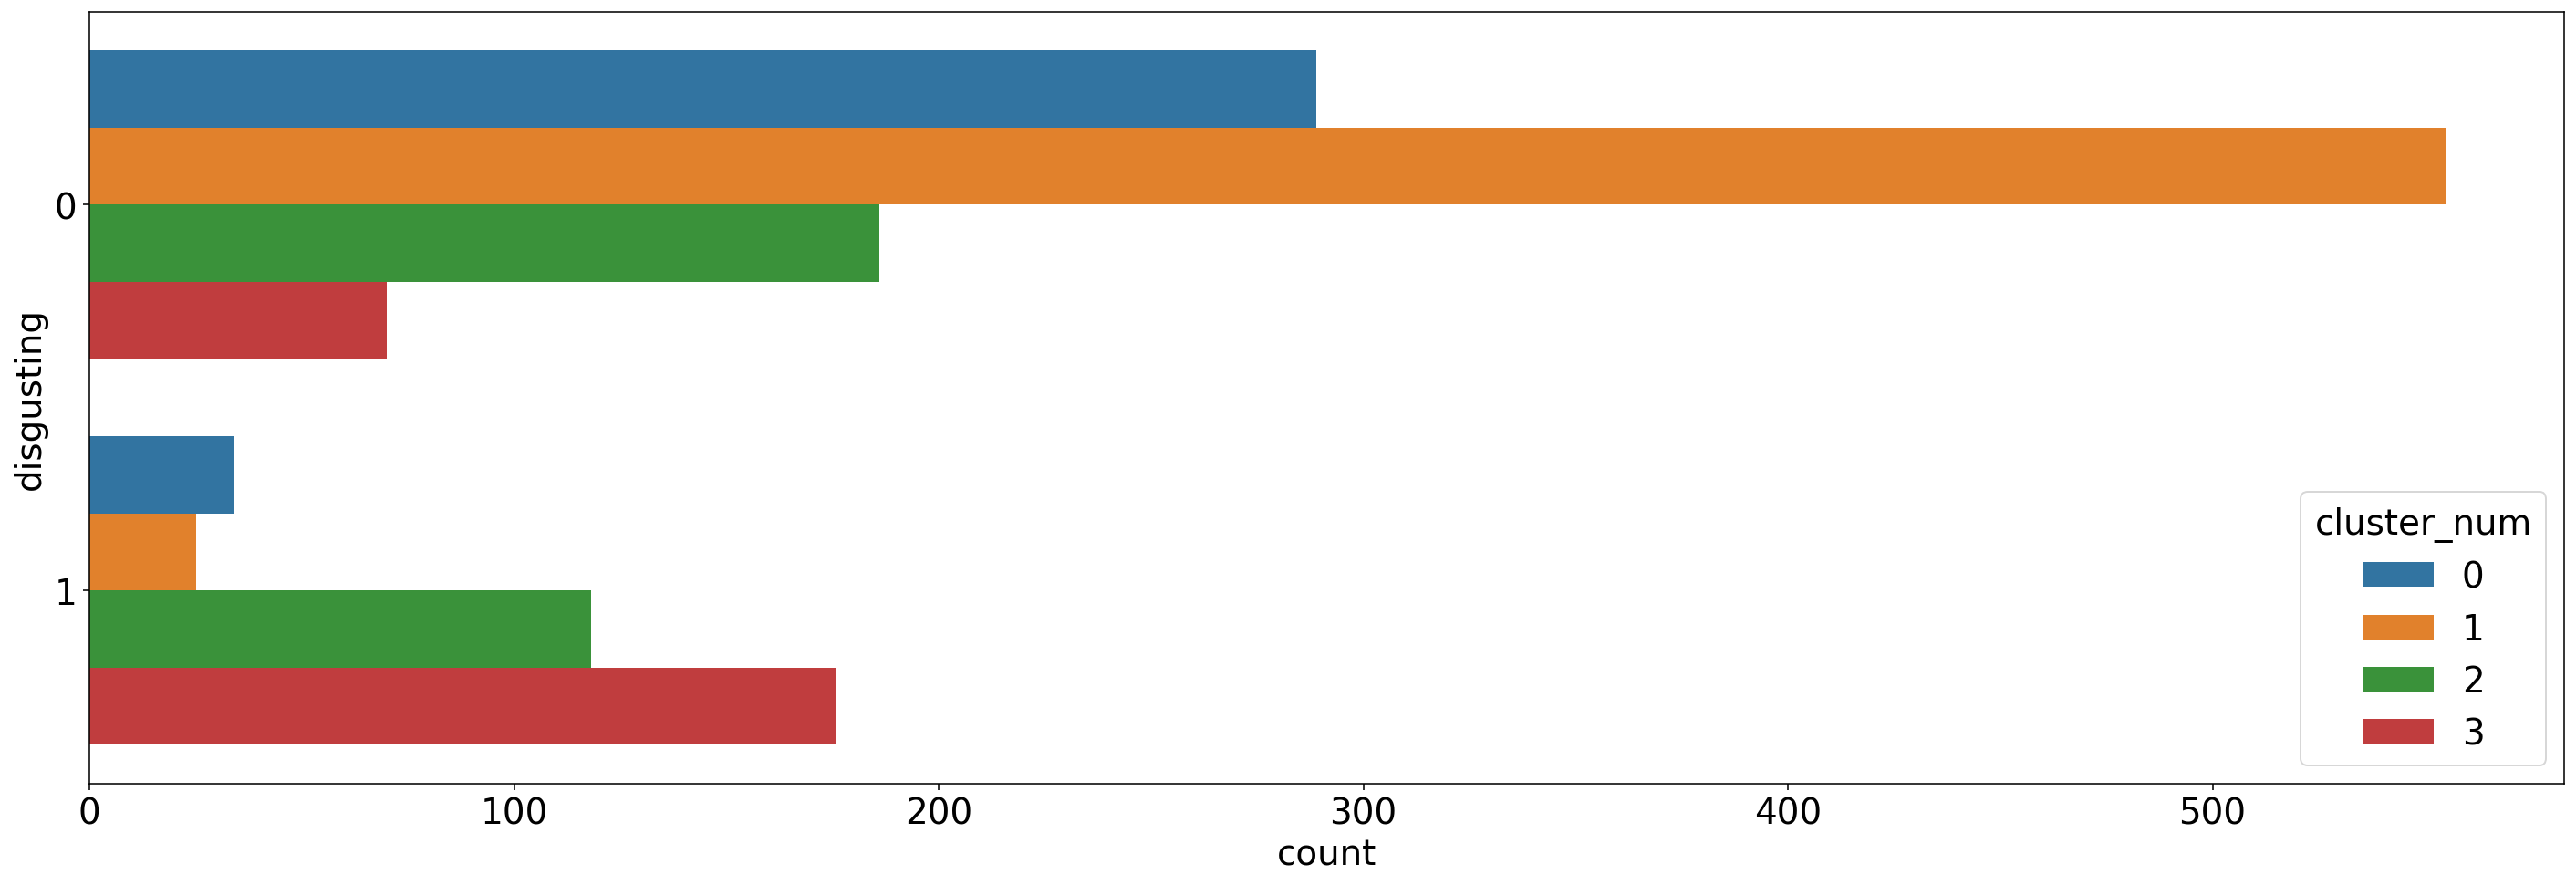

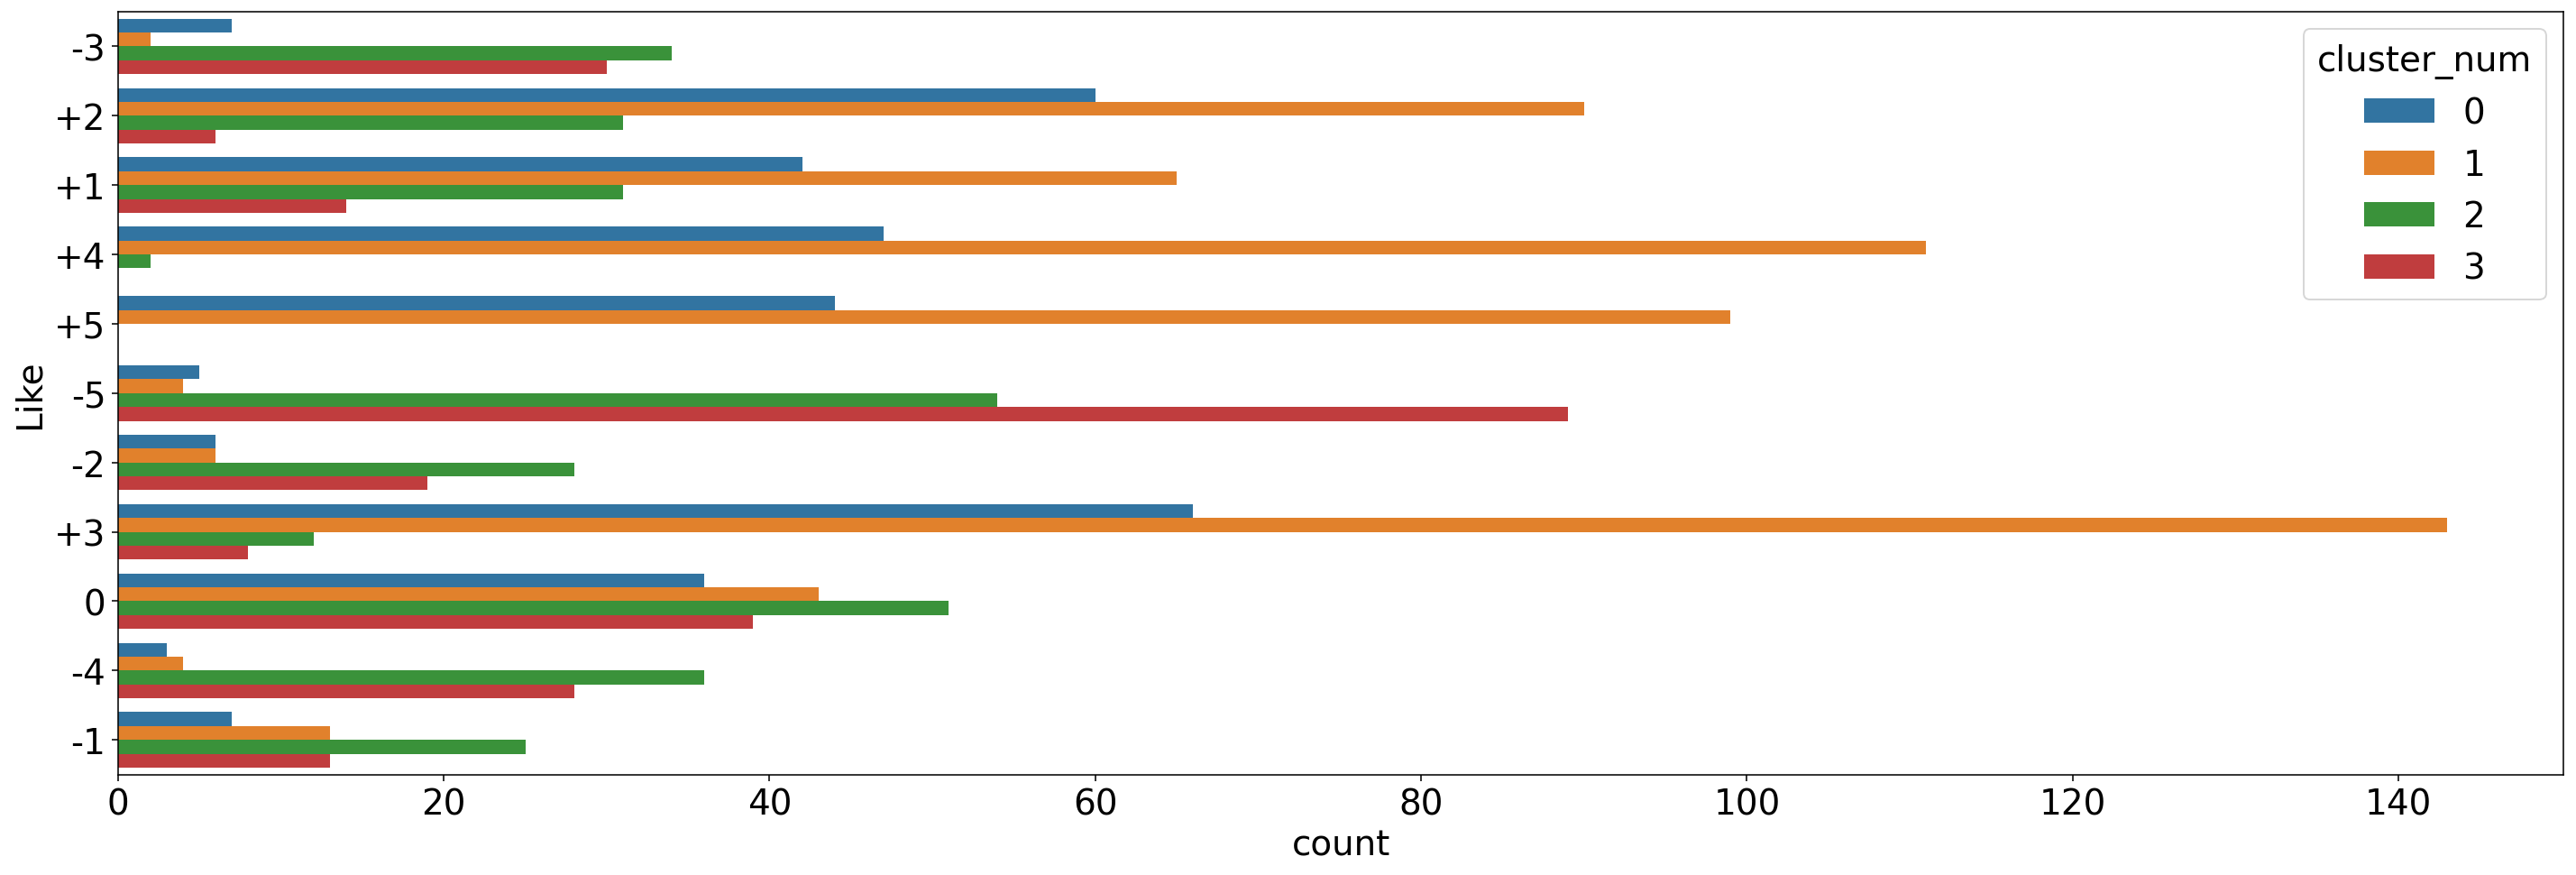

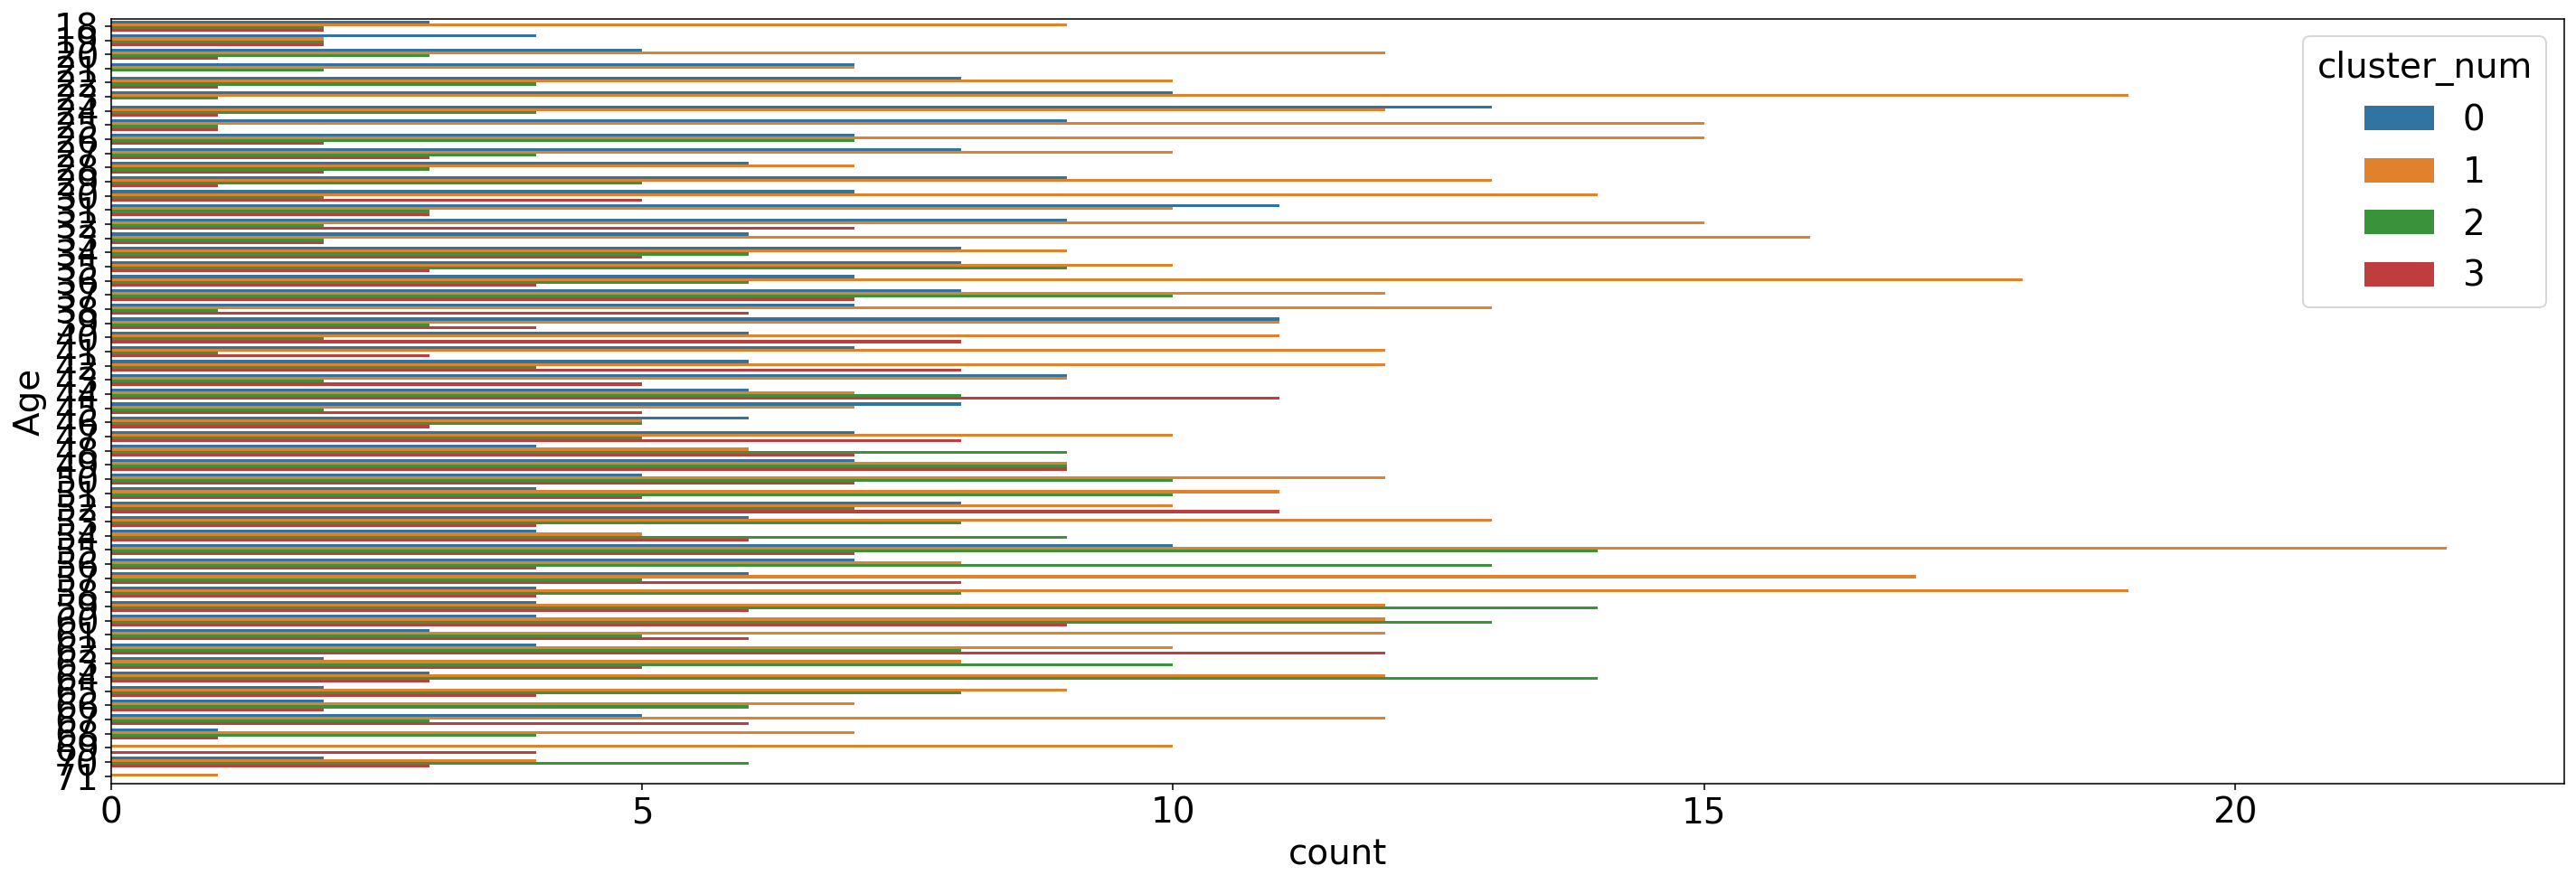

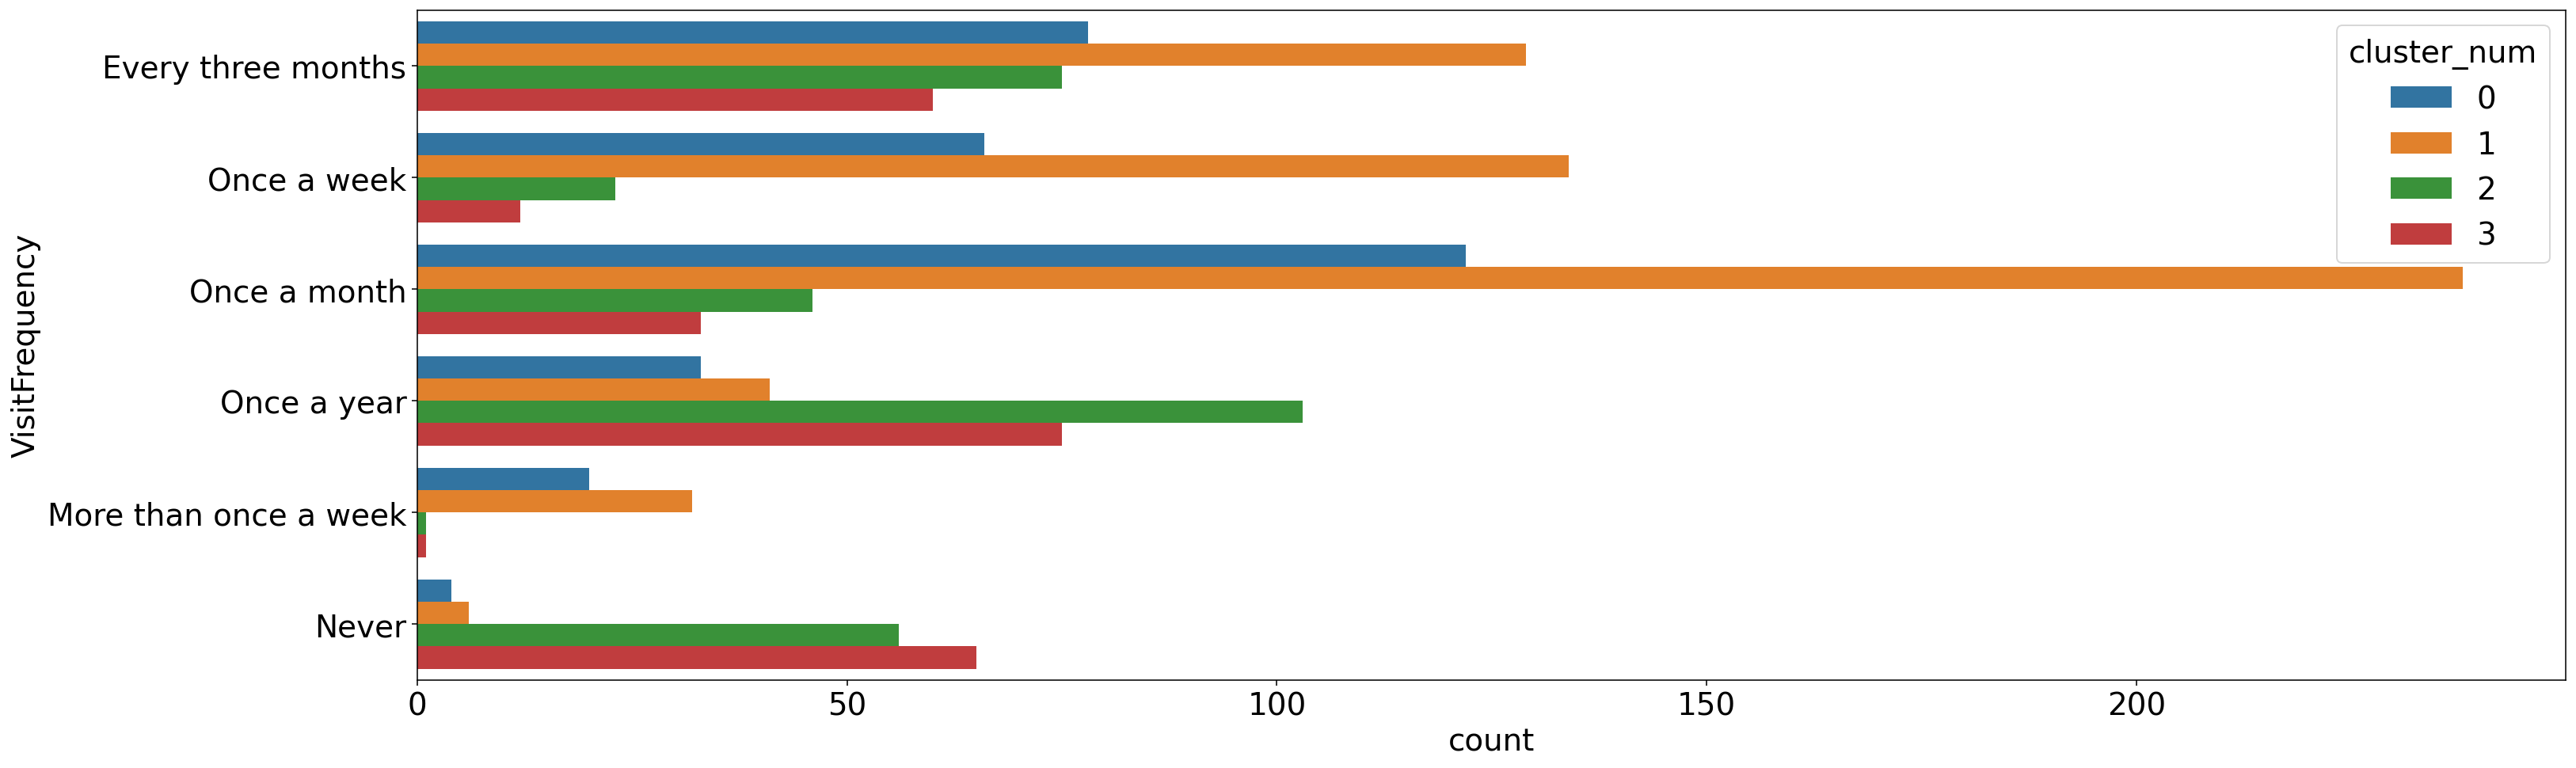

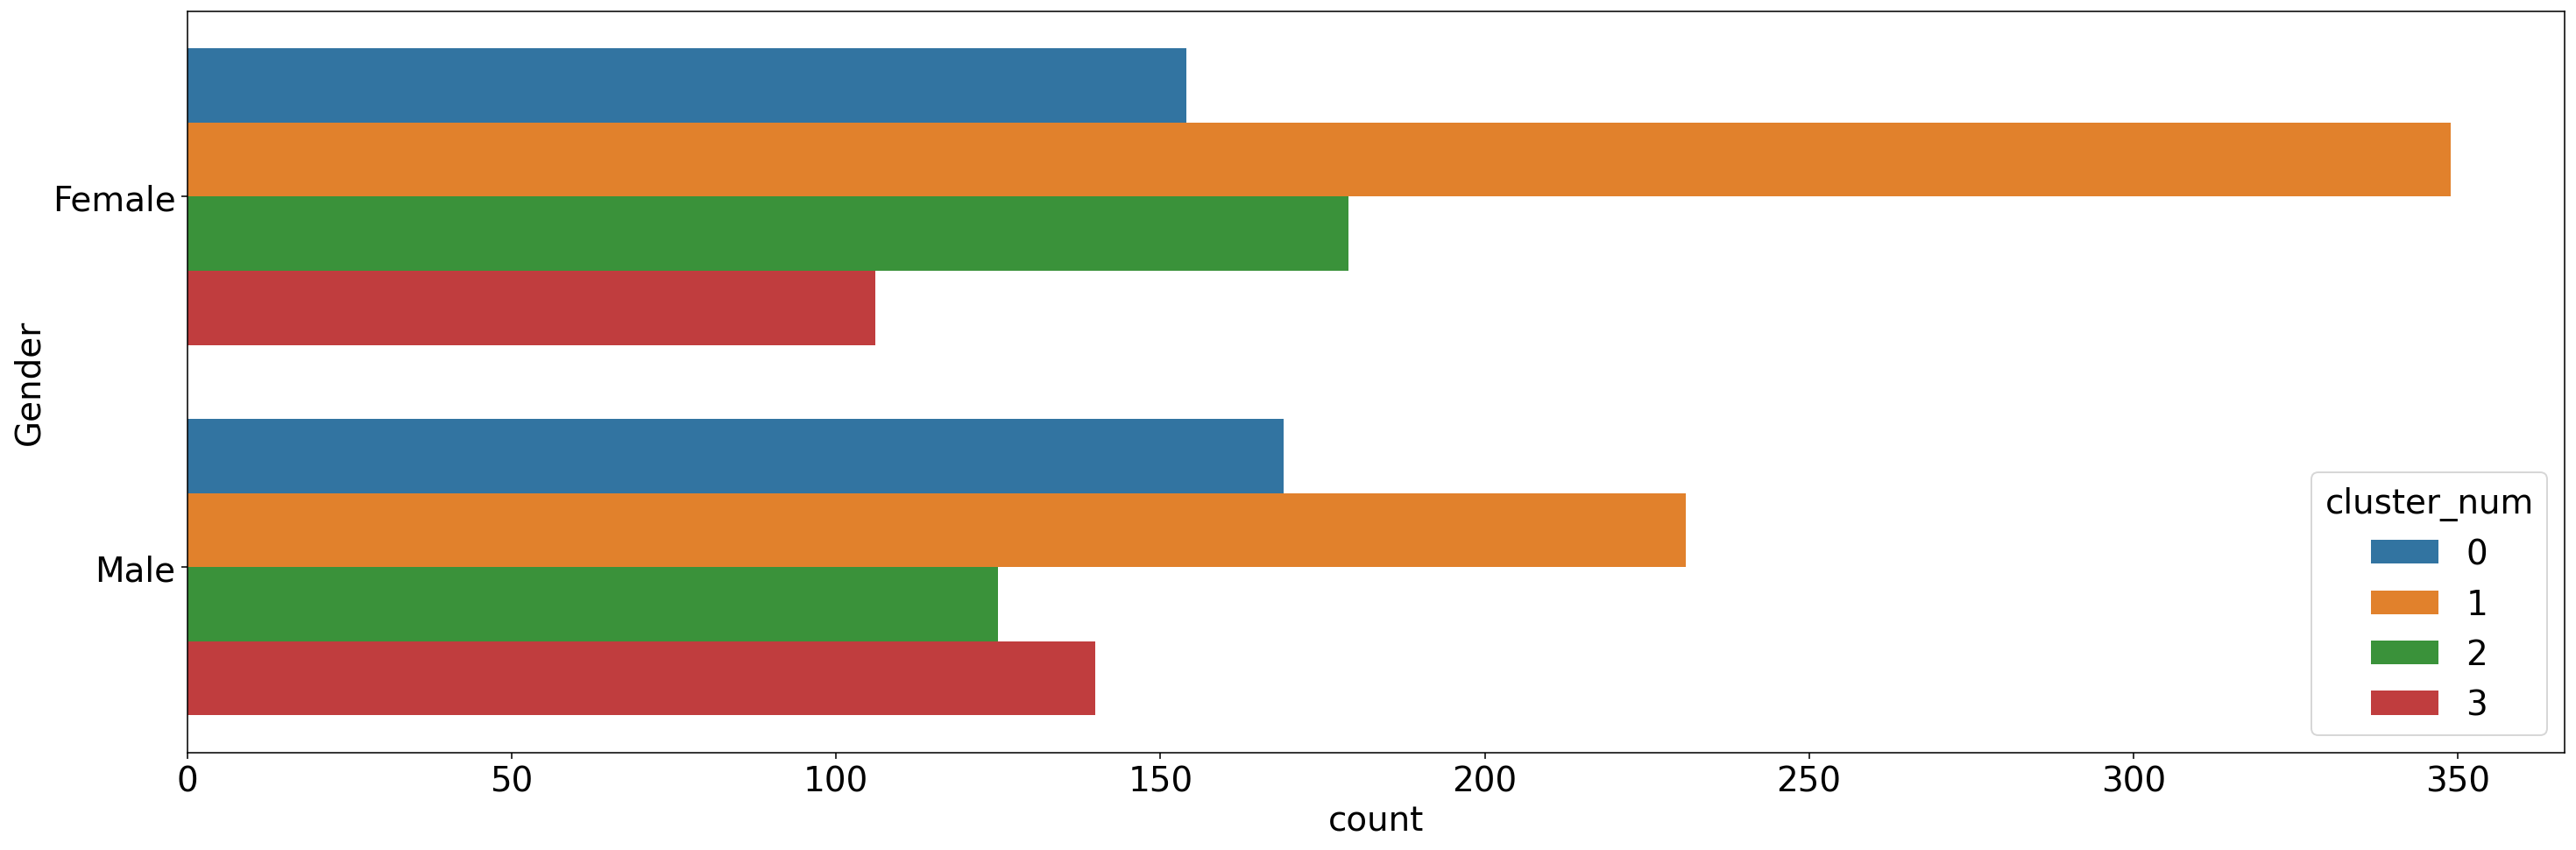

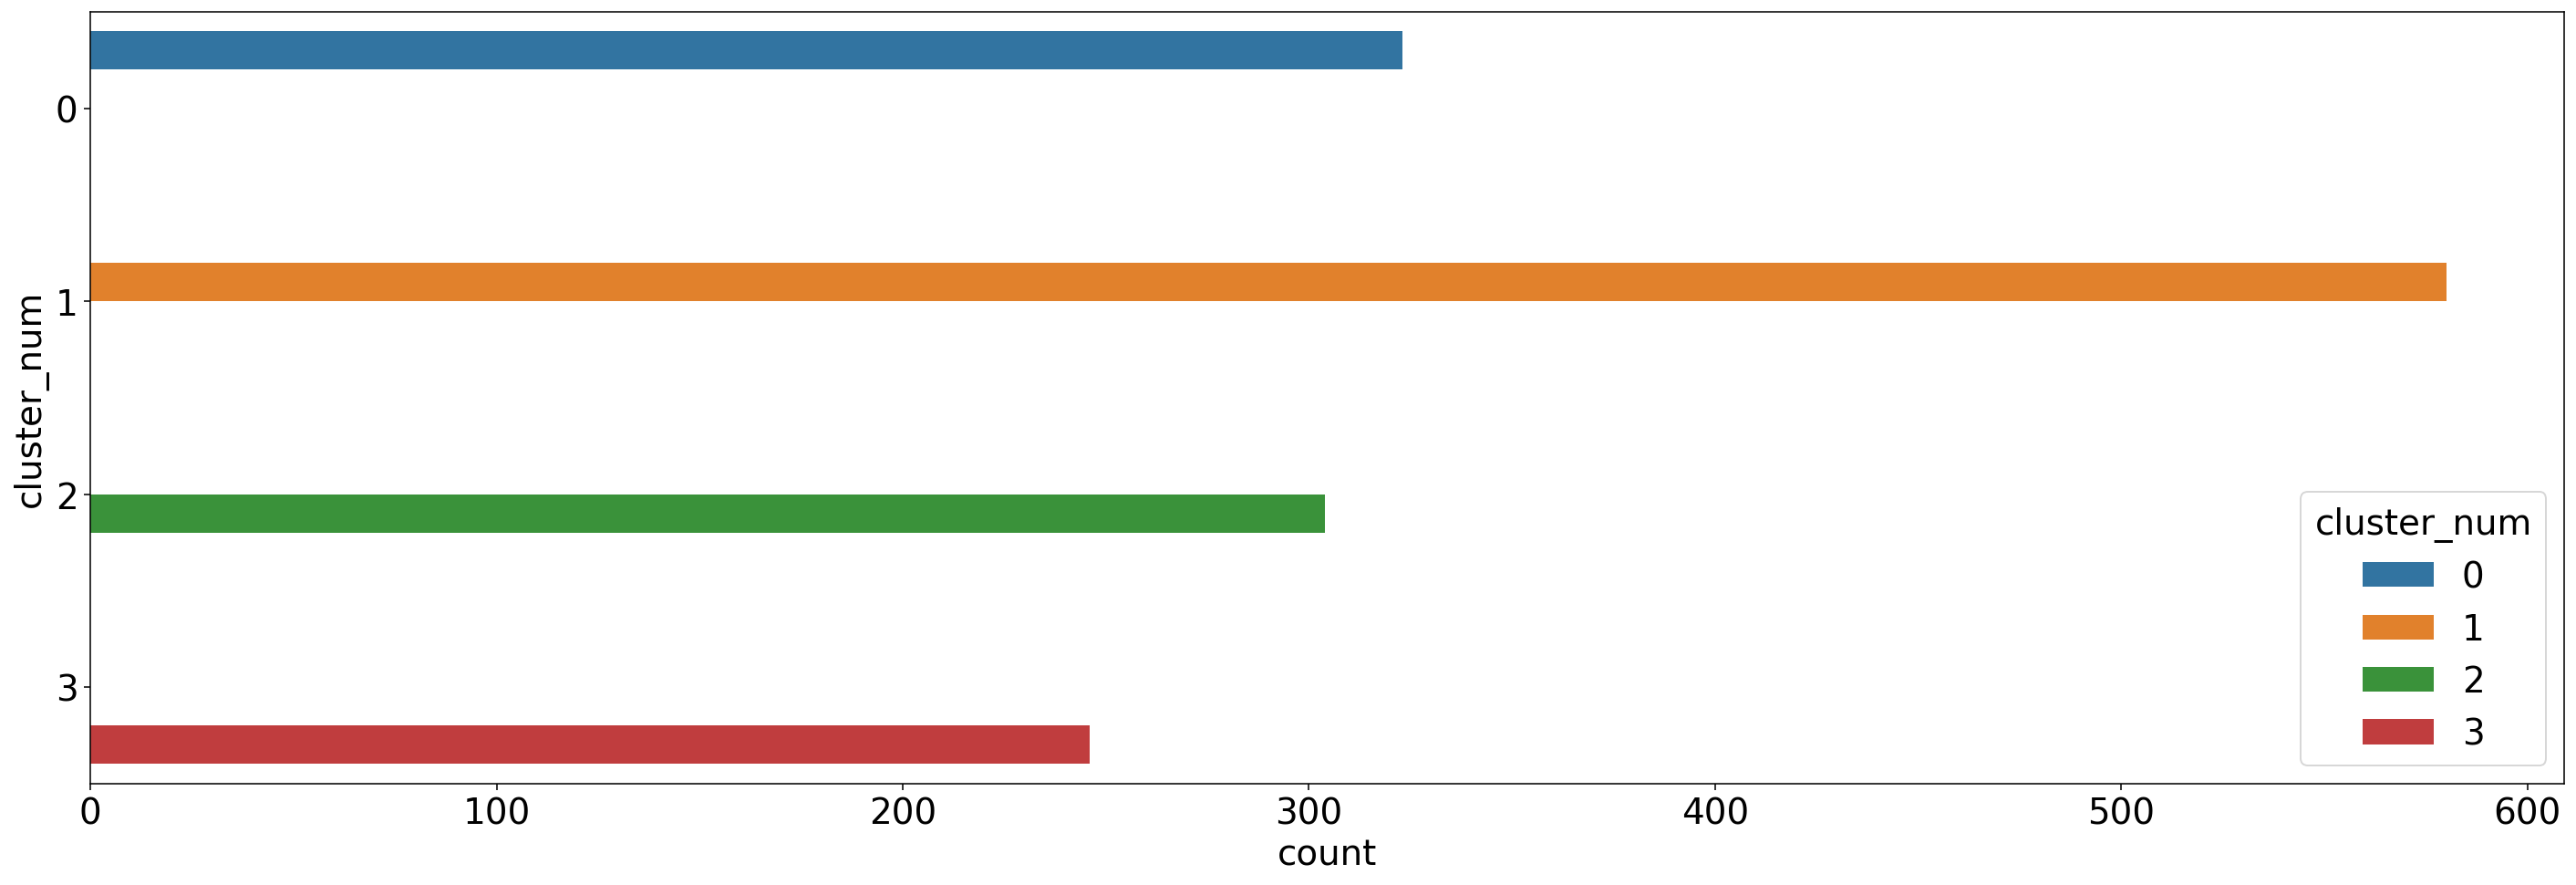

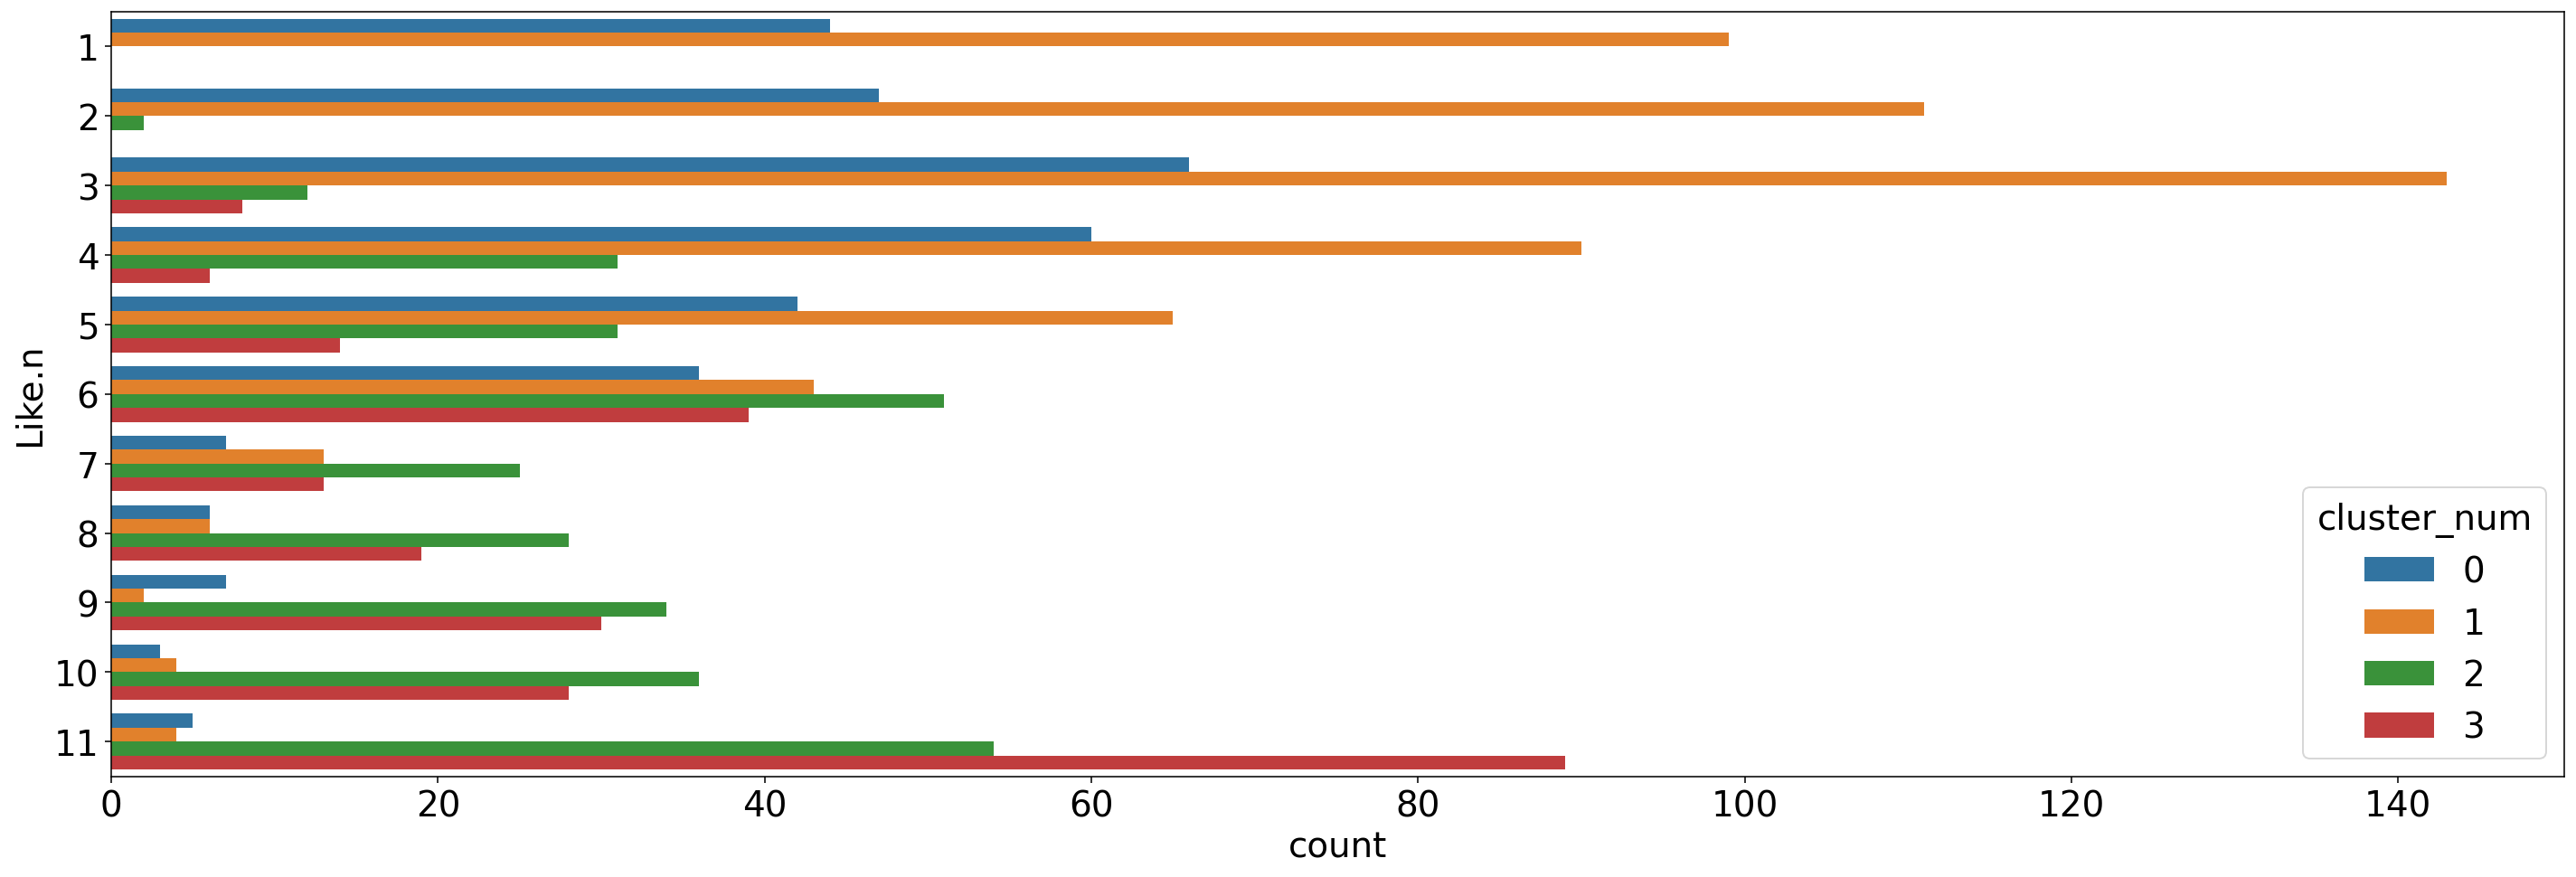

In [29]:
fig=plt.figure(figsize=(10,8))

for i in mcd.columns:
    sns.countplot(y=mcd[i], hue=mcd['cluster_num'], data=mcd)
#     plt.rcParams['figure.figsize'] = (25, 8)
    plt.rcParams['figure.dpi'] = 140
    plt.rcParams['font.size'] = 20
    plt.show()

'Like.n' column analysis

<Figure size 1400x1120 with 0 Axes>

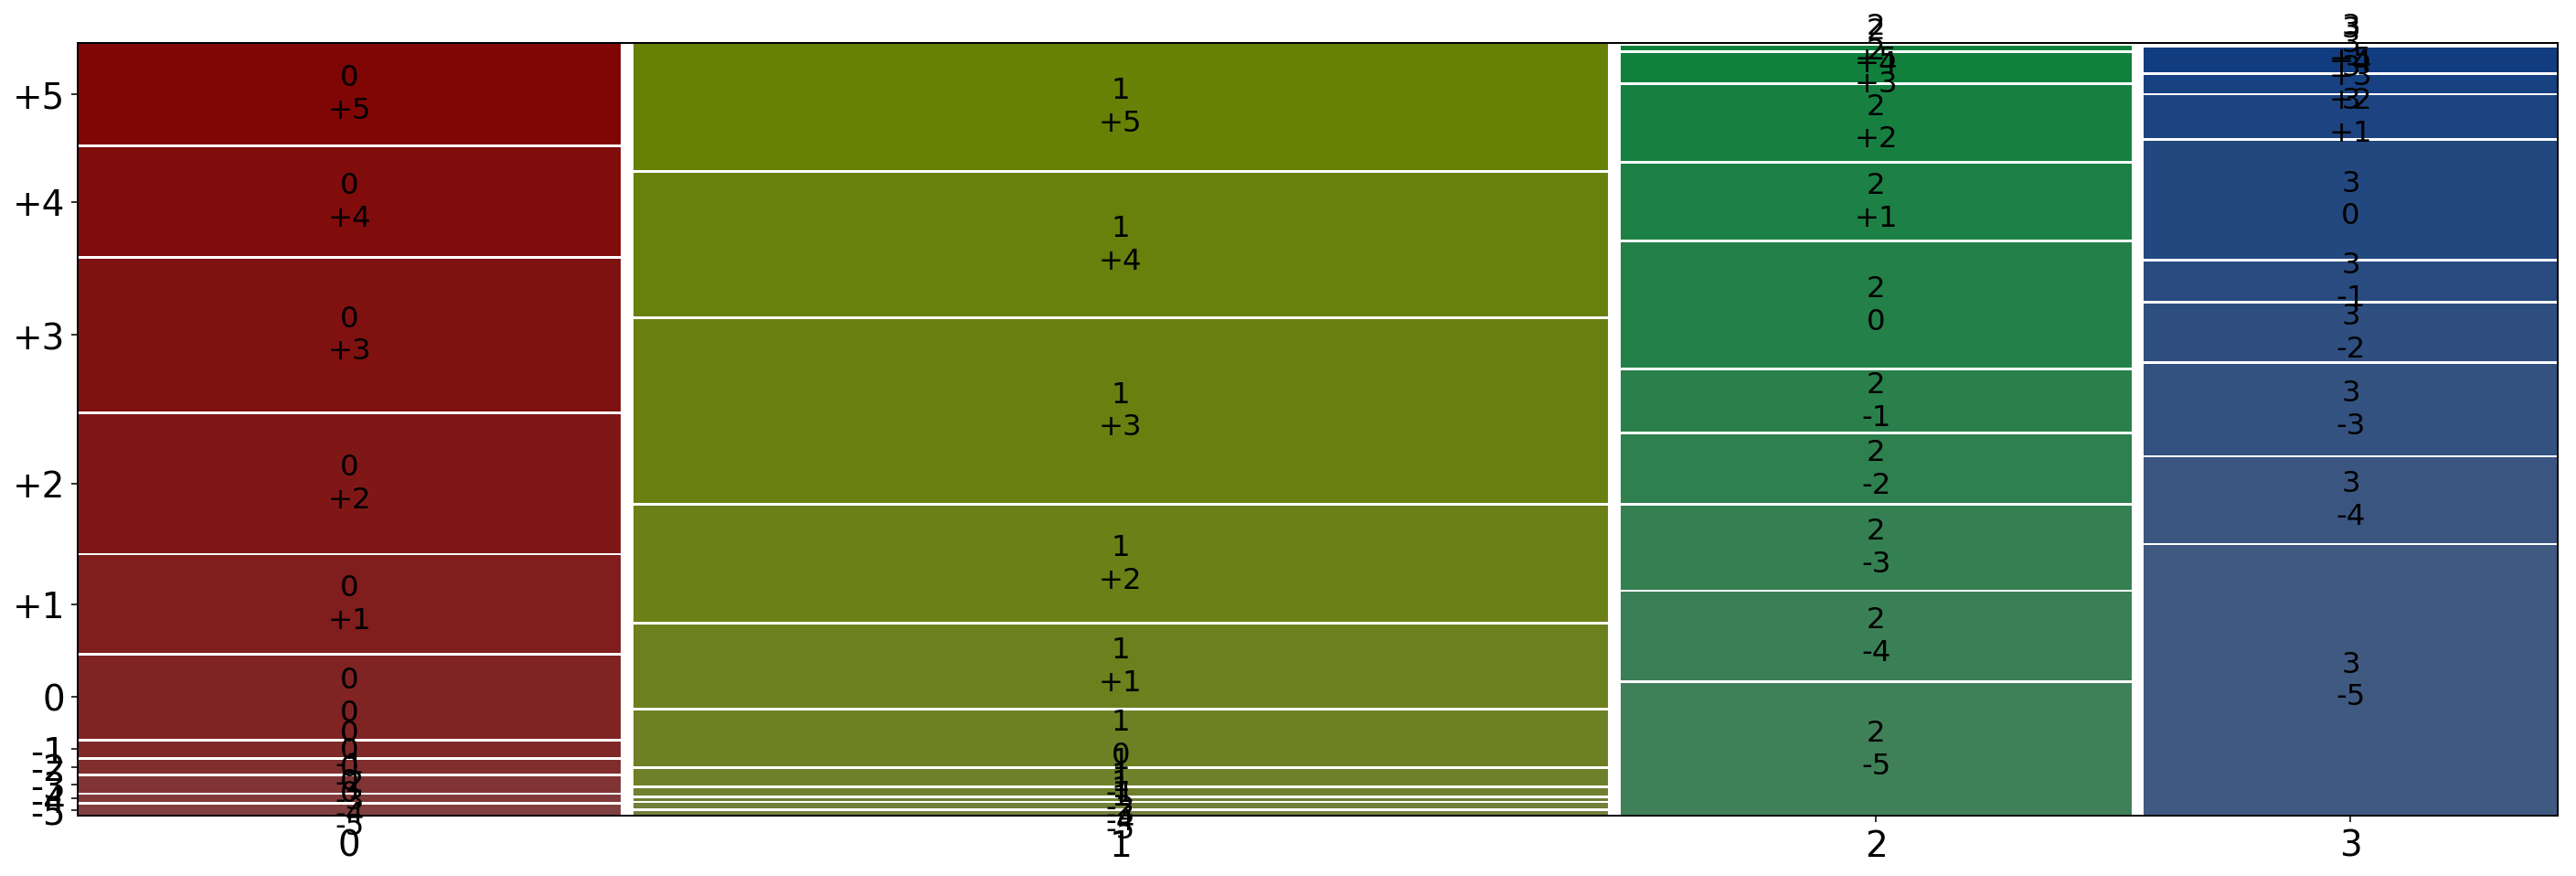

In [30]:
fig=plt.figure(figsize=(10,8))
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 5
plt.show()

Gender Analysis

<Figure size 2800x2240 with 0 Axes>

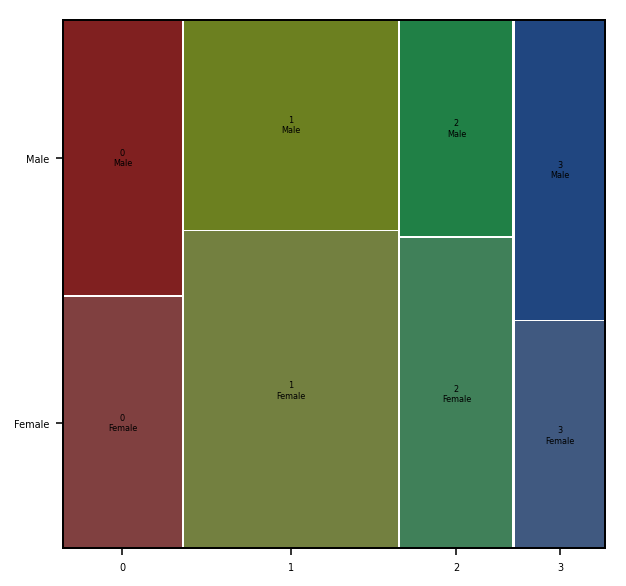

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20,16))


crosstab = pd.crosstab(mcd['cluster_num'], mcd['Gender'])

# Reordering columns
crosstab = crosstab[['Female', 'Male']]

mosaic(crosstab.stack())

plt.show()


Age analysis

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

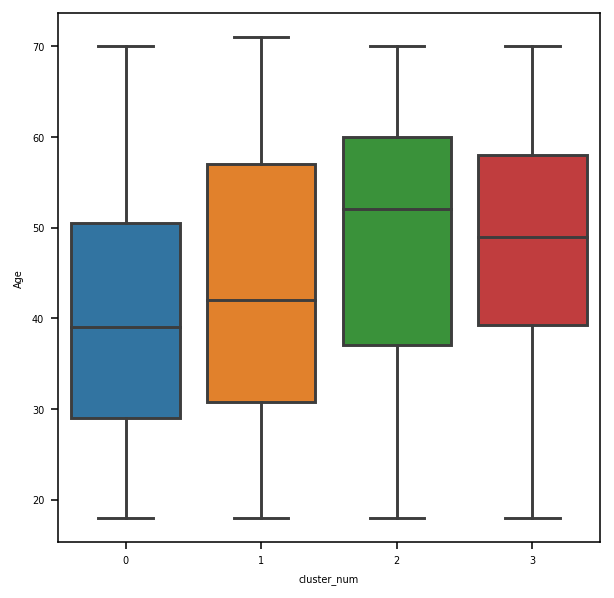

In [32]:
sns.boxplot(x='cluster_num', y='Age', data=mcd)

Decision tree to show splits for various segments according to various functions

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
trainX, testX, trainY, testY = train_test_split(mcd.drop(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like','VisitFrequency','Gender','Age'],axis=1), mcd['cluster_num'])

In [35]:
dt=DecisionTreeClassifier()
dt.fit(trainX,trainY)


DecisionTreeClassifier()

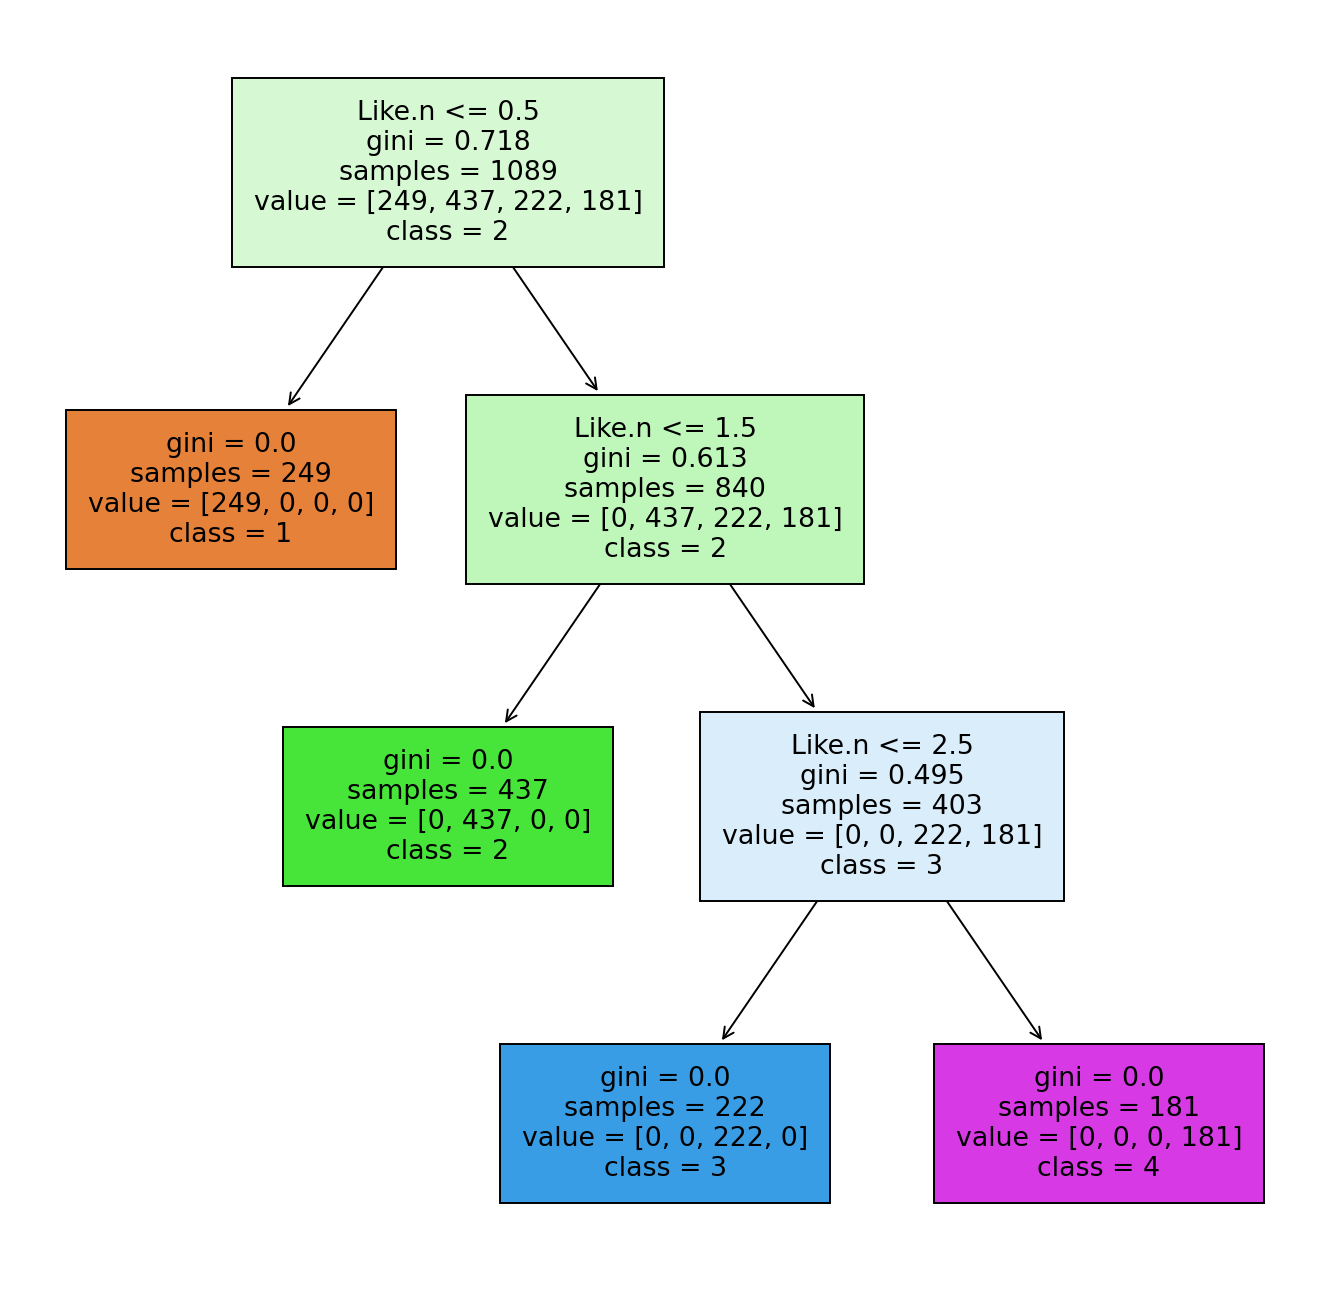

In [36]:
from sklearn import tree

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dt, filled=True, feature_names=['Like.n','Age'], class_names=['1','2','3','4'], ax=ax)

plt.show()

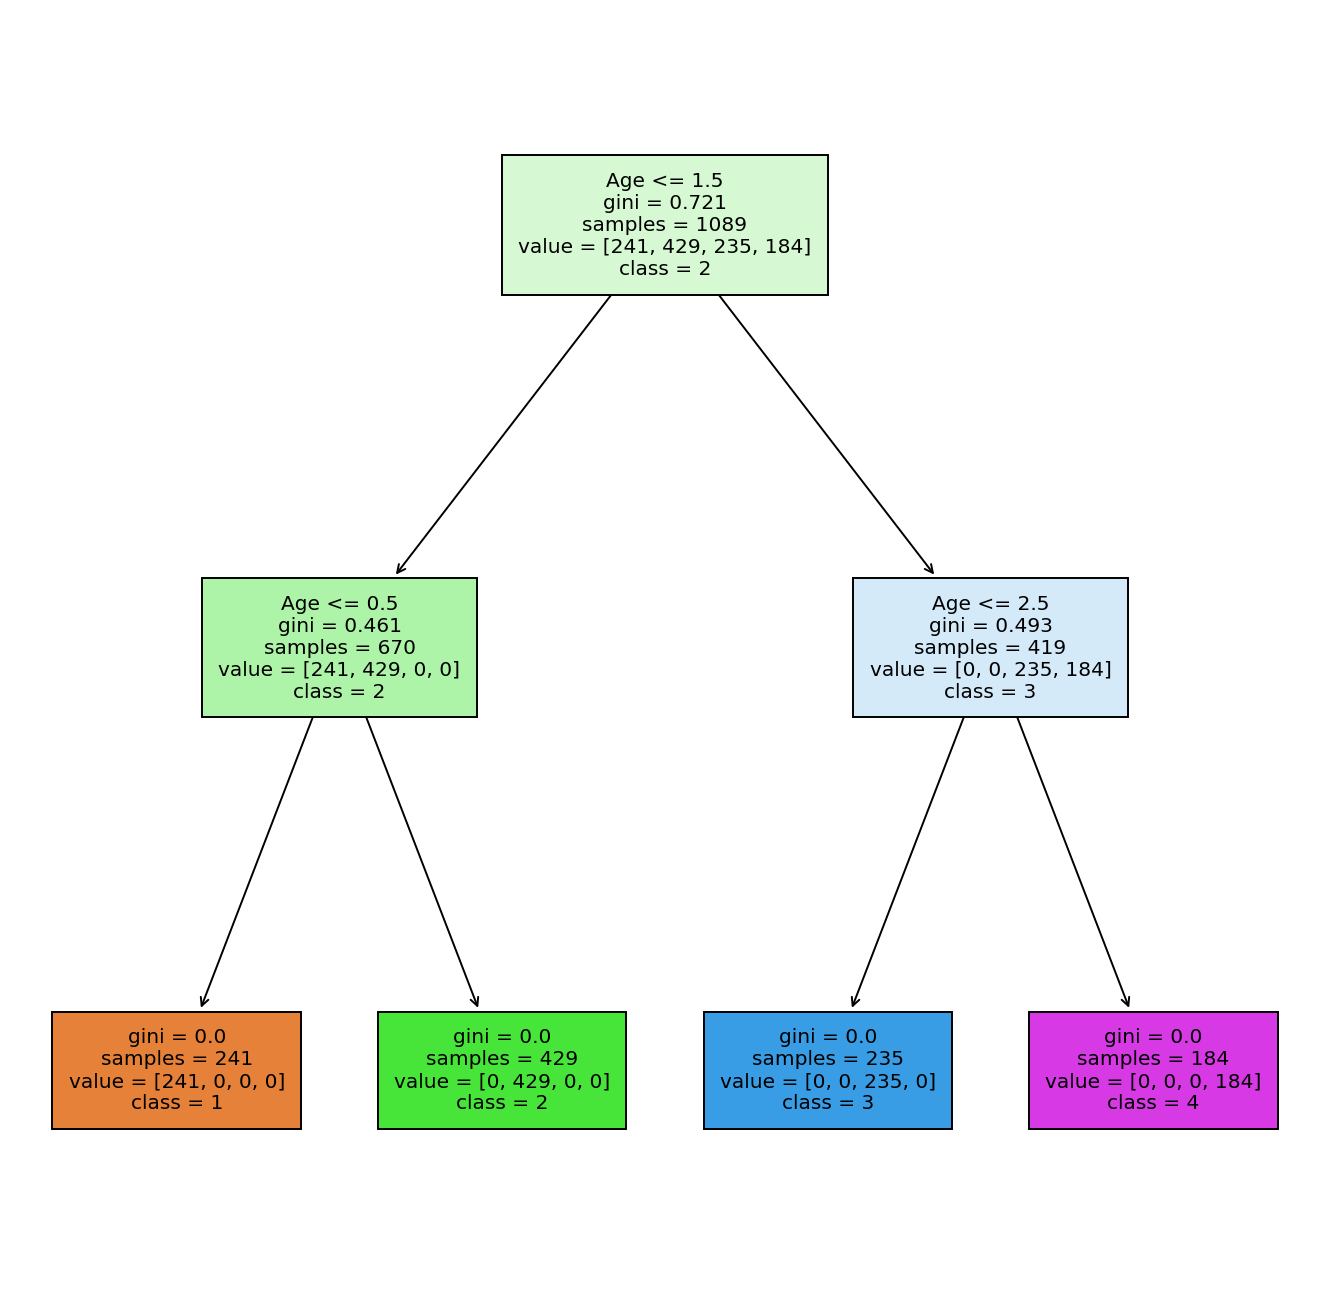

In [37]:
trainX, testX, trainY, testY = train_test_split(mcd.drop(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like','VisitFrequency','Gender','Like.n'],axis=1), mcd['cluster_num'])

dt=DecisionTreeClassifier()
dt.fit(trainX,trainY)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dt, filled=True, feature_names=['Like.n','Age'], class_names=['1','2','3','4'], ax=ax)

plt.show()